# PREMIER LEAGUE ANALYSIS

### *Słowo wstępu*

Przedmiotem poniższej analizy jest angielska liga piłkarska Premier League. W pierwszej części podjęto próbę sprawdzenia co "piszczy" w lidze jako całości, a następnie skupiono się przede wszystkim na wynikach osiąganych przez drużynę Liverpoolu. 

## MODUŁY

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## USTAWIENIA

In [2]:
# Ustawienia wyświetlania
#pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 50)
pd.set_option('precision', 2)
%matplotlib inline

# Stałe dla lokalizacji na dysku
DIR = '.'
EXTENSION = '.csv'

# Lokalizacja wygenerowanych wykresów
IMG_PATH = os.path.join(DIR, "Wykresy")

# Funkcja zapisująca wygenerowane wykresy do pliku
def save_plot(name, extension='jpg', resolution=300):
    os.makedirs(IMG_PATH, exist_ok=True)
    plot_path = os.path.join(IMG_PATH, name + '.' + extension)
    plt.savefig(plot_path, format=extension, dpi=resolution)

## DANE
Uwaga!

Poniższe zestawienia zawierają dane do dnia 09.03.2020 włącznie. Powodem jest zawieszenie rozgrywek w związku z pandemią koronawirusa. Rozgrywki zostały wznowione po przeprowadzeniu poniższej analizy.
### Wczytanie danych

#### Results:
Plik 'results_all.csv' zawiera wyniki wszystkich meczów Premier League w sezonach 2006/2007 - 2019/2020.

In [3]:
results = pd.read_csv('results_all.csv')

id_r = [x for x in range(1, len(results)+1)]
results.insert(0, 'id', id_r)

#### Statistics:
Plik 'stats_all.csv' zawiera statystyki wszystkich drużyn występujących w Premier League w sezonach 2006/2007 - 2019/2020.

In [4]:
stats = pd.read_csv('stats_all.csv')

id_s = [x for x in range(1, len(stats)+1)]
stats.insert(0, 'id', id_s)

#### LFC seasons:
Plik 'LFC_seasons.csv' zawiera statystyki Liverpoolu na koniec każdego sezonu Premier League w latach 1963/1964 - 2019/2020.

In [5]:
lfc_data = pd.read_csv('LFC_seasons.csv')

### Obróbka danych

#### Results:
- Nazwy kolumn są jasne do zrozumienia, dlatego pozostawiono je bez zmian.
- Zestawienie nie zwiera żadnych wartości nieznanych (NaN).
- Zmianie uległy typy danych: 
    - *object* --> *category*
    - *float* --> *int* (brak w zestawieniu wartości zmiennoprzecinkowych).

In [6]:
# lista nazw kolumn:
results_col_names = list(results.columns)

# zmiana typu danych:
for col in results_col_names:
    if results[col].dtype == 'object':
        results[col] = results[col].astype('category')
    elif results[col].dtype == 'float':
        results[col] = results[col].astype('int')

#### Statistics:
- Nazwy wybranych kolumn zostały zmienione w celu łatwiejszej identyfikacji kategorii, której dotyczą.
- Wszystkie wartości nieznane NaN zostały zastąpione wartością 0.
- Zmianie uległy typy danych: 
    - *object* --> *category*
    - *float* --> *int* (brak w zestawieniu wartości zmiennoprzecinkowych).

In [7]:
# lista nazw kolumn:
stats_col_names = list(stats.columns)

# lista nowych nazw kolumn:
new_stats_col_names = ['id', 'team', 'wins', 'losses', 'goals', 'y_cards', 'r_cards', 'shots', 'shots_on_target', 
                       'hit_woodwork', 'goals_head', 'goals_pen', 'goals_fkick', 'goals_in_box', 
                       'goals_out_box', 'goals_c_attack', 'offsides', 'clean_sheets', 'goals_conc', 
                       'saves', 'blocks', 'interceptions', 'tackles', 'last_man_tackles', 'clearances', 'head_clearances',
                       'own_goals', 'pen_conc', 'pen_goals_conc', 'passes', 'through_balls', 'long_balls', 
                       'backward_passes', 'crosses', 'corners_taken', 'touches', 'big_chances_missed', 'off_line_clearances',
                       'dispossessed', 'pen_saved', 'high_claims', 'punches', 'season']

# parowanie starych nazw kolumn z nowymi:
name_pairs = {}

for i in range(len(stats_col_names)):
    name_pairs[stats_col_names[i]] = new_stats_col_names[i]

# zmiana nazw kolumn
stats.rename(columns=name_pairs, inplace=True)

# zastąpienie wartości nieznanych NaN przez 0:
stats = stats.fillna(value=0)

# zmiana typów danych:
stats_col_names = list(stats.columns)

for col in stats_col_names:
    if stats[col].dtype == 'object':
        stats[col] = stats[col].astype('category')
    elif stats[col].dtype == 'float':
        stats[col] = stats[col].astype('int')

#### LFC seasons:
- Nazwy kolumn są jasne do zrozumienia, dlatego pozostawiono je bez zmian.
- Zestawienie nie zwiera żadnych wartości nieznanych (NaN).
- Zmianie uległy typy danych: 
    - *object* --> *category*

In [8]:
# lista nazw kolumn:
lfc_data_col_names = list(lfc_data.columns)

# zmiana typu danych:
for col in lfc_data_col_names:
    if lfc_data[col].dtype == 'object':
        lfc_data[col] = lfc_data[col].astype('category')

### Dane do analizy

#### Results:
##### Kolumny:
- *home_team* - drużyna grająca u siebie
- *away_team* - drużyna grająca na wyjeździe
- *home_goals* - bramki zdobyte przez drużynę grającą u siebie
- *away_team* - bramki zdobyte przez drużynę grającą na wyjeździe
- *result* - końcowy wynik, gdzie: 
    - *H* - wygrała drużyna grająca u siebie (*Home*)
    - *A* - wygrała drużyna grająca na wyjeździe (*Away*)
    - *D* - remis (*Draw*)
- *season* - sezon

In [9]:
results.head()

,id,home_team,away_team,home_goals,away_goals,result,season
0,1,Sheffield United,Liverpool,1,1,D,2006-2007
1,2,Arsenal,Aston Villa,1,1,D,2006-2007
2,3,Everton,Watford,2,1,H,2006-2007
3,4,Newcastle United,Wigan Athletic,2,1,H,2006-2007
4,5,Portsmouth,Blackburn Rovers,3,0,H,2006-2007


#### Statistics:
##### Kolumny:
- *team* - nazwa drużyny
- *wins* - liczba zwycięstw
- *losses* - liczba porażek
- *goals* - liczba zdobytych bramek
- *y_cards* - liczba kartek żółtych
- *r_card* - liczba kartek czerwonych
- *shots* - liczba strzałów na bramkę (ogólnie)
- *shots_on_target* - liczba strzałów w światło bramki
- *hit_woodwork* - liczba strzałów, które skończyły na poprzeczce lub słupku
- *goals_head* - liczba bramek zdobytych głową
- *goals_pen* - liczba bramek zdobytych z rzutu karnego
- *goals_fkick* - liczba bramek zdobytych z rzutu wolnego
- *goals_in_box* - liczba bramek zdobytych z pola karnego
- *goals_out_box* - liczba bramek zdobytych spoza pola karnego
- *goals_c_attack* - liczba bramek zdobytych po kontrataku
- *offsides* - liczba popełnionych spalonych
- *clean_sheets* - liczba meczów bez straty gola
- *goals_conc* - liczba bramek straconych
- *saves* - liczba obronionych rzutów karnych
- *blocks* - liczba zablokowanych strzałów rywala
- *interceptions* - liczba przechwytów
- *tackles* - liczba wślizgów ogółem
- *last_man_tackles* - liczba wślizgów wykonanych przez ostatniego zawodnika drużyny broniącej
- *clearances* - liczba wybić piłki ze swojego pola karnego ogółem
- *head_clearances* - liczba wybić piłki ze swojego pola karnego głową
- *own_goals* - liczba bramek samobójczych
- *pen_conc* - liczba sprokurowanych rzutów karnych
- *pen_goals_conc* - liczba bramek straconych po rzutach karnych
- *passes* - liczba podań ogółem
- *through_balls* - liczba górnych podań za linię obrony
- *long_balls* - liczba długich podań
- *backward_passes* - liczba podań do tyłu
- *crosses* - liczba podań krzyżowych (cross'ów)
- *corners_taken* - liczba rzutów rożnych
- *touches* - liczba dotknięć piłki
- *big_chances_missed* - liczba niewykorzystanych stuprocentowych okazji
- *off_line_clearances* - liczba wybić piłki z linii bramkowej
- *dispossessed* - liczba strat piłki
- *pen_saved* - liczba obronionych rzutów karnych
- *high_claims* - liczba górnych piłek wyłapanych przez bramkarza
- *punches* - liczba piąstkowań wykonanych przez bramkarza
- *season* - sezon

In [10]:
stats.head()

,id,team,wins,losses,goals,y_cards,r_cards,shots,shots_on_target,hit_woodwork,goals_head,goals_pen,goals_fkick,goals_in_box,goals_out_box,goals_c_attack,offsides,clean_sheets,goals_conc,saves,blocks,interceptions,tackles,last_man_tackles,clearances,head_clearances,own_goals,pen_conc,pen_goals_conc,passes,through_balls,long_balls,backward_passes,crosses,corners_taken,touches,big_chances_missed,off_line_clearances,dispossessed,pen_saved,high_claims,punches,season
0,1,Manchester United,28,5,83,60,1,698,256,21,12,5,1,72,11,9,80,16,27,2,81,254,890,1,1222,0,1,5,3,18723,0,2397,0,918,258,25686,0,1,0,2,37,25,2006-2007
1,2,Chelsea,24,3,64,62,4,636,216,14,16,3,6,41,23,6,127,22,24,4,74,292,982,0,1206,0,1,3,2,16759,0,2270,0,897,231,24010,0,2,0,1,74,22,2006-2007
2,3,Liverpool,20,10,57,44,0,668,214,15,8,6,1,46,11,3,120,20,27,1,65,246,969,2,1115,0,0,1,1,17154,0,2800,0,1107,282,24150,0,1,0,0,51,27,2006-2007
3,4,Arsenal,19,8,63,59,3,638,226,19,10,10,3,53,10,7,111,12,35,6,73,214,998,1,1202,0,1,3,3,18458,0,2045,0,873,278,25592,0,1,0,0,88,27,2006-2007
4,5,Tottenham Hotspur,17,12,57,48,3,520,184,6,5,6,2,44,13,9,149,6,54,11,128,276,995,2,1412,0,2,7,6,14914,0,2408,0,796,181,22200,0,2,0,0,51,24,2006-2007


#### LFC seasons:
##### Kolumny:
- *season* - sezon
- *league* - poziom rozgrywkowy, gdzie:
    - *Premier League* - najwyższa klasa rozgrywkowa w Anglii (nazwa obowiązująca od sezonu 92/93) 
    - *First Division* - najwyższa klasa rozgrywkowa w Anglii (nazwa obowiązująca do sezonu 91/92) 
- *W* - liczba zwycięstw
- *D* - liczba remisów
- *L* - liczba porażek
- *goals_scored* - liczba bramek zdobytych
- *goals_conceded* - liczba bramek straconych
- *goals_diff* - różnica pomiędzy bramkami zdobytymi i straconymi
- *points* - liczba zdobytych punktów
- *place* - miejsce w tabeli na koniec sezonu
- *coach* - trener

In [11]:
lfc_data.head()

,season,league,W,D,L,goals_scored,goals_conceded,goals_diff,points,place,coach
0,2019-2020,Premier League,27,1,1,66,21,45,82,1,Jürgen Klopp
1,2018-2019,Premier League,30,7,1,89,22,67,97,2,Jürgen Klopp
2,2017-2018,Premier League,21,12,5,84,38,46,75,4,Jürgen Klopp
3,2016-2017,Premier League,22,10,6,78,42,36,76,4,Jürgen Klopp
4,2015-2016,Premier League,16,12,10,63,50,13,60,8,Jürgen Klopp


## ANALIZA

## JEJ WYSOKOŚĆ PREMIER LEAGUE

**English Premier League** to najwyższa klasa męskich rozgrywek piłkarskich w Anglii nazywana tak od 1992 roku (wcześniej **First Division**). Jej zmagania odbywają się co roku od sierpnia do maja i bierze w nich udział 20 najlepszych drużyn klubowych w kraju. Jest to najchętniej oglądana liga sportowa na świecie oraz przynosi ona największe dochody spośród wszystkich rozgrywek piłkarskich. Pierwszym jej zwycięzcą został Manchester United. Jest on również klubem, który jak do tej pory najczęściej wygrywał te rozgrywki (13). Obecnym triumfatorem jest drużyna Manchesteru City (2018/2019).

### *Jej Atrakcyjność*

Premier League uchodzi za jedną z najatrakcyjniejszych lig na świecie. Nie dość, że grają w niej kluby o uznanej marce, to jeszcze występy w ojczyźnie futbolu, jak nigdzie indziej, dają możliwość zapisania się w historii i - co niemniej ważne - solidnie zarobić. Co jednak ma z tego zwykły kibic? Czy z jego punktu widzenia warto poświęcać swój czas i pieniądze na tego typu rozrywkę?

**Filtrowanie danych**

In [12]:
# Suma bramek w każdym z meczów
attract_res = results.copy()
goals = attract_res['home_goals'] + attract_res['away_goals']
attract_res.insert(5, 'goals', goals)

# Krotności liczby bramek
goals_total = attract_res.groupby(['goals']).count()['id']
goals_total = goals_total.reset_index().rename(columns={'id':'total'})

# Statystyki
attract_stat = stats.copy()

**Wizualizacja**

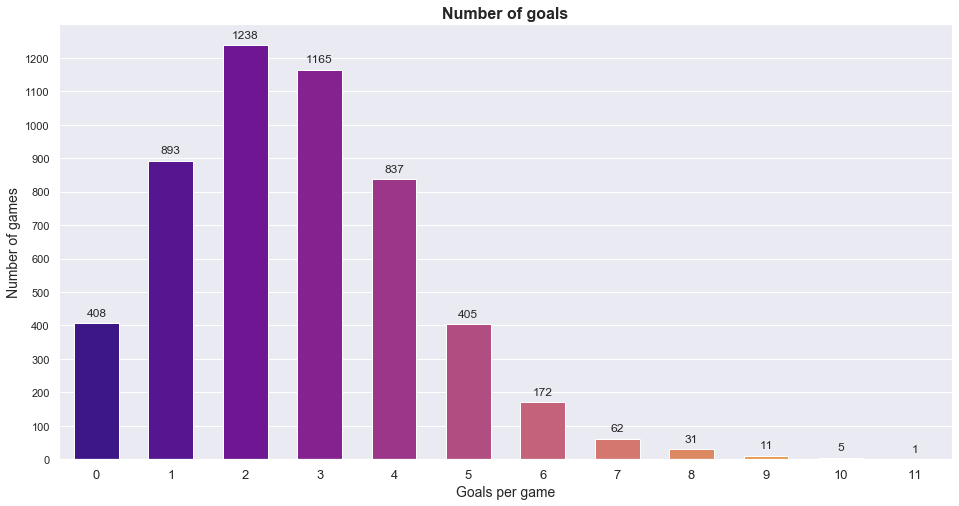

In [13]:
# WYKRES KOLUMNOWY
plt.figure(figsize=(16,8))
sns.set(style='darkgrid')
plot = sns.barplot(data=goals_total, x='goals', y='total', palette='plasma')
plt.xlabel('Goals per game', size=14)
plt.ylabel('Number of games', size=14)
plt.xticks(size=13)
plt.yticks([x for x in range(0,1300,100)])
plt.title('Number of goals', weight='bold', size=16)

## Szerokość słupków oraz adnotacje
def new_params(ax, new_value) :
    for p in plot.patches:
        curr_width = p.get_width()
        diff = curr_width - new_value
        # zmiana szerokości
        p.set_width(new_value)
        # osiowanie słupków
        p.set_x(p.get_x() + diff * 0.5)
        # adnotacje
        plot.annotate(format(int(p.get_height()), 'd'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', 
                      va='center', xytext=(0, 10), textcoords='offset points')

new_params(plot, 0.6)

#save_plot('Number_of_goals')
plt.show()

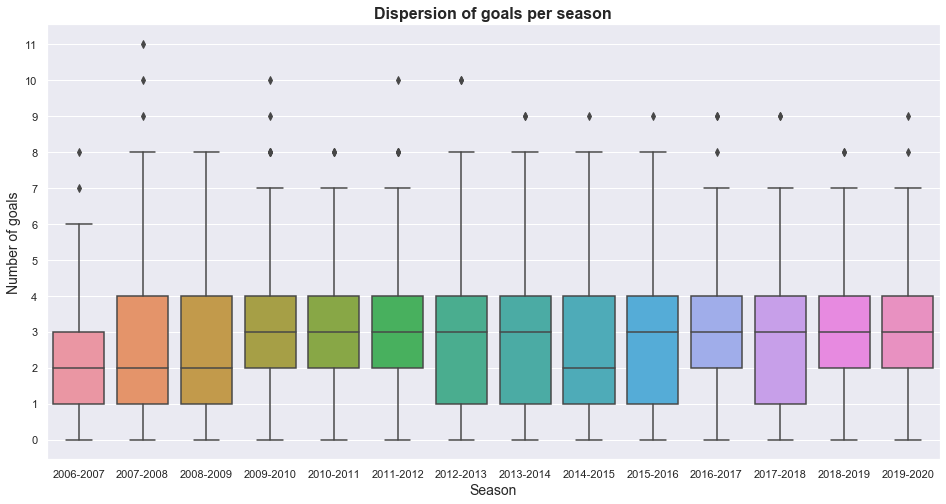

In [14]:
# Rozproszenie liczby bramek w poszczególnych sezonach
goals_per_season = attract_res.groupby(['season'])

# WYKRES PUDEŁKOWY
plt.figure(figsize=(16,8))
sns.set(style='darkgrid')
plot = sns.boxplot(data=attract_res, x='season', y='goals')
plt.xlabel('Season', size=14)
plt.ylabel('Number of goals', size=14)
plt.yticks([x for x in range(0, 12)])
plt.title('Dispersion of goals per season', weight='bold', size=16)

#save_plot('Dispersion_of_goals_per_season')
plt.show()

**Podsumowanie**

In [15]:
# Średnia okazji do zdobycia bramki na mecz w sezonach 06/07 - 19/20
chances_mean = round(attract_stat['shots'].sum() / len(attract_res), 2)

# Średnia bramek na mecz w sezonach 06/07 - 19/20
goals_mean = round(attract_res['goals'].mean(), 2)

# Najwyższa liczba bramek w meczu
max_goals_perg = max(goals)

# Odchylenie standardowe
goals_std_dev = round(np.std(attract_res['goals']), 2)

# Współczynnik zmienności
goals_var_factor = round(goals_std_dev / goals_mean * 100, 2)

# Procent meczów bezbramkowych w sezonach 06/07 - 19/20
goals_zero = round(len(attract_res.query('goals == 0')) / len(attract_res) * 100, 2)

print('Średnia okazji do zdobycia bramki na mecz:', chances_mean)
print('Średnia bramek na mecz:', goals_mean)
print('Najwyższa liczba bramek w meczu:', max_goals_perg)
print('Procent meczów bezbramkowych:', goals_zero, '%')
print()
print('Zmienność wyników:')
print('- odchylenie liczby bramek od średniej:', goals_std_dev)
print('- współczynnik zmienności:', goals_var_factor, '%')

Średnia okazji do zdobycia bramki na mecz: 26.84
Średnia bramek na mecz: 2.7
Najwyższa liczba bramek w meczu: 11
Procent meczów bezbramkowych: 7.8 %

Zmienność wyników:
- odchylenie liczby bramek od średniej: 1.66
- współczynnik zmienności: 61.48 %


**Wnioski**

W ciągu ostatnich kilunastu lat w Premier League padało średnio 2.7 bramki na mecz, a drużyny w każdym ze spotkań tworzyły w sumie po około 27 okazji do zdobycia gola. Jedynie 7.8% wszystkich meczów zakończyło się wynikiem bezbramkowym. W zdecydowanej większości sezonów ponad 50% konfrontacji obfitowało w 3 lub więcej trafień. Zdarzały się ponadto spotkania zakończone typowo "hokejowym" wynikiem, gdzie liczba zdobytych goli potrafiła osiągnąć 6 i więcej. 

Dodatkowo, wysoki współczynnik zmienności dowodzi duże zróżnicowanie w ilości zdobywanych bramek, co oznacza jedno - w meczach ligi angielskiej naprawdę sporo się dzieje. Podsumowując, istnieją solidne podstawy by twierdzić, że angielska Premier League jest jedną z najatrakcyjnieszych lig świata.

### *Gospodarzom pomagają ściany*

Utarło się, że zdecydowanie łatwiej o pozytywny wynik, grając przed własną publicznością, aniżeli na boisku rywala. Bierze się to m.in. z faktu, że publiczność jest traktowana jako dodatkowy - 12 - zawodnik, który nie tylko zagrzewa do walki, ale też skutecznie deprymuje przeciwnika. Sprawdźmy zatem, jak jest w praktyce.

**Filtrowanie danych**

In [16]:
# Liczba zwycięstw gospodarzy, gości i remisów w poszczególnych sezonach
wins = results.groupby(['season', 'result']).count()['id']
wins = wins.reset_index().rename(columns={'id':'total'})

**Wizualizacja**

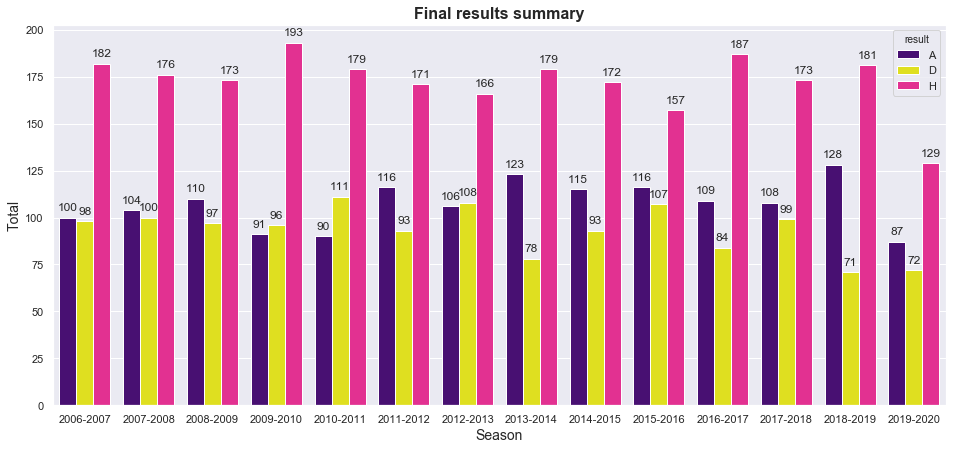

In [17]:
colors = ['indigo', 'yellow', 'deeppink']

# WYKRES KOLUMNOWY GRUPOWANY
plt.figure(figsize=(16,7))
sns.set(style='darkgrid')
plot = sns.barplot(data=wins, x='season', y='total', hue='result', palette=colors)
plt.xlabel('Season', size=14)
plt.ylabel('Total', size=14)
plt.title('Final results summary', weight='bold', size=16)

## Adnotacje
for p in plot.patches:
    plot.annotate(format(int(p.get_height()), 'd'), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', 
                     va='center', xytext=(0,10), textcoords='offset points')

#save_plot('Final_results_summary')
plt.show()

**Podsumowanie**

In [18]:
# Udział procentowy poszczególnych wyników
tot = len(results)
home = round((results.query('result == "H"').count()['result']) / tot * 100, 2)
away = round((results.query('result == "A"').count()['result']) / tot * 100, 2)
draw = round((results.query('result == "D"').count()['result']) / tot * 100, 2)

print('Procent meczów wygranych przez gospodarzy:', home, '%')
print('Procent meczów wygranych przez gości:', away, '%')
print('Procent meczów zakończonych remisem:', draw, '%')

Procent meczów wygranych przez gospodarzy: 46.25 %
Procent meczów wygranych przez gości: 28.75 %
Procent meczów zakończonych remisem: 25.0 %


**Wnioski**

Liczba zwycięstw odniesionych przez gospodarzy (*H = home*) w każdym z analizowanych sezonów wyraźnie przewyższa liczbę zwycięstw gości (*A = away*) czy podziały punktów (*D = draw*). 
Z kolei udział procentowy poszczególnych rezultatów mówi nam, że blisko co drugi mecz kończy się zwycięstwem gospodarzy, natomiast szanse na zwycięstwo gości lub remis są na zbliżonym poziomie. Wynika stąd, że w kontekście rozgrywek ligowych stwierdzenie, iż gospodarzom pomagają ściany, ma odzwierciedlenie w rzeczywistości.

### *Mój dom moją twierdzą*

Mówi się, że niektóre zespoły potrafią stworzyć istną twierdzę ze swojego stadionu. Kolejni rywale przyjeżdżają z nadzieją na zgarnięcie pełnej puli, a koniec końców zostają odprawieni z kwitkiem. Zatem, które zespoły na przestrzeni ostatnich lat radziły sobie najlepiej grając u siebie?

**Filtrowanie danych**

In [19]:
# Liczba meczów domowych ogółem poszczególnych drużyn w sezonach 06/07 - 19/20
games = results.copy()
total_games_home = games.groupby(['home_team']).count()['id']
total_games_home = total_games_home.reset_index().rename(columns={'id':'total_home_games'})

# Liczba meczów domowych bez porażki poszczególnych drużyn w sezonach 06/07 - 19/20
home_W_or_D = results.copy()
home_W_or_D = home_W_or_D.query('result == "H" or result == "D"')
home_W_or_D = home_W_or_D.groupby(['home_team']).count()['id']
home_W_or_D = home_W_or_D.reset_index().rename(columns={'id':'home_win_or_draw'})
home_W_or_D.head()

# Procent meczów domowych bez porażki poszczególnych drużyn w sezonach 06/07 - 19/20
home_W_or_D_perc = pd.merge(home_W_or_D, total_games_home, on='home_team')
home_W_or_D_perc['percent [%]'] = round((home_W_or_D_perc['home_win_or_draw'] / home_W_or_D_perc['total_home_games']) * 100, 2)
home_W_or_D_perc = home_W_or_D_perc.sort_values(by='percent [%]', ascending=False)

# Liczba wygranych meczów domowych poszczególnych drużyn w sezonach 06/07 - 19/20
home_W = results.copy()
home_W = home_W.query('result == "H"')
home_W = home_W.groupby(['home_team']).count()['id']
home_W = home_W.reset_index().rename(columns={'id':'home_wins'})

# Procent wygranych meczów domowych poszczególnych drużyn w sezonach 06/07 - 19/20
home_W_perc = pd.merge(home_W, total_games_home, on='home_team')
home_W_perc['percent [%]'] = round((home_W_perc['home_wins'] / home_W_perc['total_home_games']) * 100, 2)
home_W_perc = home_W_perc.sort_values(by='percent [%]', ascending=False)

**Podsumowanie**

In [20]:
# Pięć drużyn o najwyższym procencie meczów bez porażki u siebie
home_W_or_D_perc.head()

,home_team,home_win_or_draw,total_home_games,percent [%]
19,Liverpool,235,262,89.69
11,Chelsea,233,262,88.93
21,Manchester United,231,262,88.17
1,Arsenal,231,262,88.17
20,Manchester City,222,260,85.38


In [21]:
# Pięć drużyn o najwyższym procencie zwycięstw u siebie
home_W_perc.head()

,home_team,home_wins,total_home_games,percent [%]
21,Manchester United,189,262,72.14
20,Manchester City,183,260,70.38
1,Arsenal,173,262,66.03
11,Chelsea,172,262,65.65
19,Liverpool,168,262,64.12


**Wnioski**

Różnice w czołówce drużyn, które nie poniosły porażki na swoim stadionie są naprawdę niewielkie. W zestawieniu prowadzi Liverpool (89.69%) przed Chelsea (88.93%) i Manchesterem United (88.17%). Wynik ten oznacza, że średnio tylko 1 na 10 meczów przed własną publicznością zakończył się porażką drużyny z Anfield. 

Inaczej wygląda sytuacja, jeśli weźmiemy pod uwagę same zwycięstwa. The Reds zajmują tutaj dopiero piąte miejsce (64.12%), co świadczy o tym, że spory odsetek meczów bez porażki stanowią w ich przypadku remisy. Stawce przewodzą kluby z Manchesteru, odpowiednio United (72.14%) i City (70.38%). 

Wyniki Czerwonych Diabłów w obu zestawieniach dowodzą, że jest to drużyna, która najlepiej radzi sobie jako gospodarz, a Old Trafford śmiało można uznać za obiekt, na którym drużynom przyjezdnym gra się zdecydowanie najciężej. 

### *Bezwzględni czy beznadziejni*

W obecnym kształcie futbol polega przede wszystkim na zdobywaniu bramek i póki co nie przynaje się punktów za stworzone, ale niewykorzystane, okazje. Która drużyna zatem zachowuje ogółem najwięcej zimnej krwi pod bramką rywala?

**Filtrowanie danych**

In [24]:
# Efektywność poszczególnych drużyn ogółem
eff = stats[['team', 'id', 'shots', 'shots_on_target', 'goals']]
eff = eff.groupby(['team']).sum()
eff['goals_acc [%]'] = round((eff['goals'] / eff['shots_on_target']) * 100, 2)
eff = eff.sort_values(by=['goals_acc [%]'], ascending=False).reset_index()

**Wizualizacja**

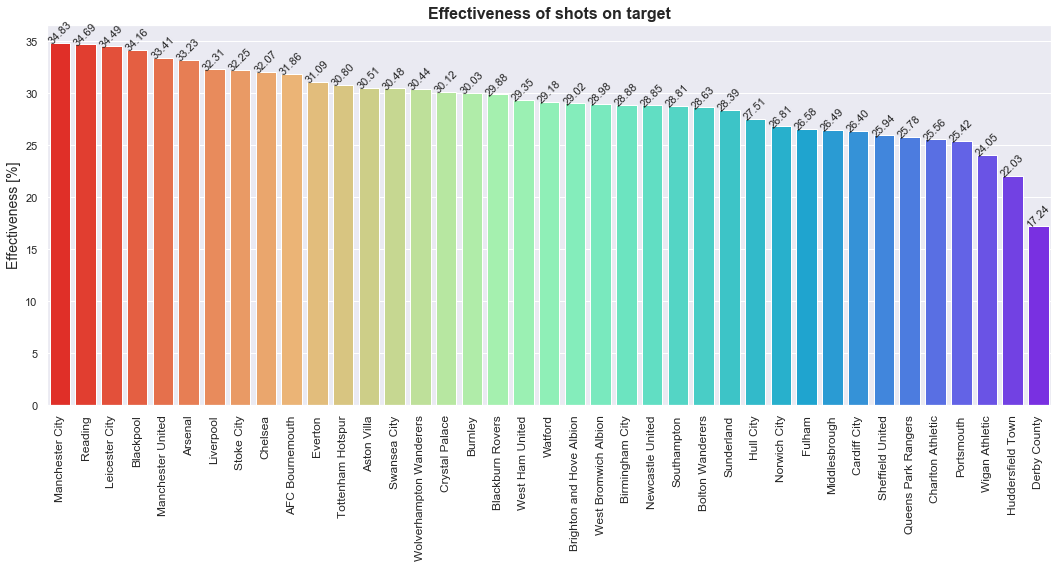

In [25]:
# WYKRES KOLUMNOWY
plt.figure(figsize=(18,7))
sns.set(style='darkgrid')
plot = sns.barplot(data=eff, x=eff['team'], y=eff['goals_acc [%]'], order=eff['team'], 
                   palette='rainbow_r')
plt.xlabel('')
plt.ylabel('Effectiveness [%]', size=14)
plt.xticks(rotation='vertical', size=12)
plt.title('Effectiveness of shots on target', weight='bold', size=16)

## Adnotacje
for p in plot.patches:
    plot.annotate(format(float(p.get_height()), '.2f'), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', 
                     va='center', xytext=(0,10), textcoords='offset points', size=11, rotation=45)

#save_plot('Effectiveness_of_shots_on_target')
plt.show()

**Podsumowanie**

In [26]:
# Zespół o najwyższej skuteczności
most_eff = max(eff['goals_acc [%]'])
most_eff_idx = eff.index[eff['goals_acc [%]']==most_eff]
for i in most_eff_idx:
    print('Zespół o najwyższej skuteczności:', eff['team'][i], '(', most_eff, '% )')

# Zespół o najniższej skuteczności
low_eff = min(eff['goals_acc [%]'])
low_eff_idx = eff.index[eff['goals_acc [%]']==low_eff]
for i in low_eff_idx:
    print('Zespół o najniższej skuteczności:', eff['team'][i], '(', low_eff, '% )')

Zespół o najwyższej skuteczności: Manchester City ( 34.83 % )
Zespół o najniższej skuteczności: Derby County ( 17.24 % )


**Wnioski** 

Drużyną o najwyższej skuteczności jest Manchester City (34.83%), co nie powinno dziwić, biorąc pod uwagę siłę tej drużyny w ataku oraz sukcesy w ostatnich latach. Na szczególną uwagę zasługuje uzyskanie tak wysokiego wskaźnika skuteczności przy bardzo wysokiej liczbie oddanych strzałów (2954 - trzeci wynik pod tym względem ogółem). Przykładowo, Reading będące na drugim miejscu w zestawieniu (34.69% - wynik gorszy od City jedynie o 0.14 punktu procentowego), oddało aż o 2562 strzały celne mniej. Różnica jest zatem kolosalna i świadczy o powtarzalności, a co za tym idzie, klasie drużyny z Manchesteru. Ciekawostką jest na pewno obecność w czołówce drużyny z Blackpool, jednak tutaj podobnie, jak w przypadku Reading, mamy do czynienia z niewielką liczbą celnych uderzeń.

Na drugim biegunie znajdują się takie zespóły, jak Wigan, Huddersfield czy Derby County, które to w ciągu ostatnich 14 lat zagrało jedynie jeden sezon w najwyższej klasie rozgrywkowej i, mówiąc krótko, nie popisało się. Skuteczność na poziomie 17.24% wyraźnie odstaje od reszty stawki.

## THE REDS

**Liverpool Football Club** (*The Reds*) to angielski klub piłkarski występujący na codzień w Premier League. Założony w 1892 roku z siedzibą mieszczącą się przy Anfield Road w Liverpoolu. Drugi najbardziej utytułowany klub w Anglii (18 tytułów mistrzowskich) oraz trzeci w Europie (6 zwycięstw). Według magazynu Forbes sklasyfikowany na ósmym miejscu w światowym rankingu najbardziej wartościowych klubów piłkarskich. Obecnie trenerem pierwszego zespołu jest niemiecki trener Jurgen Klopp.

### *Średnioskuteczni*

Skoro jesteśmy przy skuteczności sprawdźmy, jak wygląda pod tym kątem zespół Liverpoolu zarówno na tle innych drużyn, jak i w konkretnych latach.

**Filtrowanie danych**

In [27]:
# Skuteczność w kolejnych latach
lfc_pos = lfc_data[['season', 'place', 'coach']]

lfc_eff = stats[['team', 'id', 'shots_on_target', 'goals', 'season']]
lfc_eff = lfc_eff.query('team == "Liverpool"')
lfc_eff['goals_acc [%]'] = round((lfc_eff['goals'] / lfc_eff['shots_on_target']) * 100, 2)
lfc_eff = pd.merge(lfc_eff, lfc_pos, on='season')

**Wizualizacja**

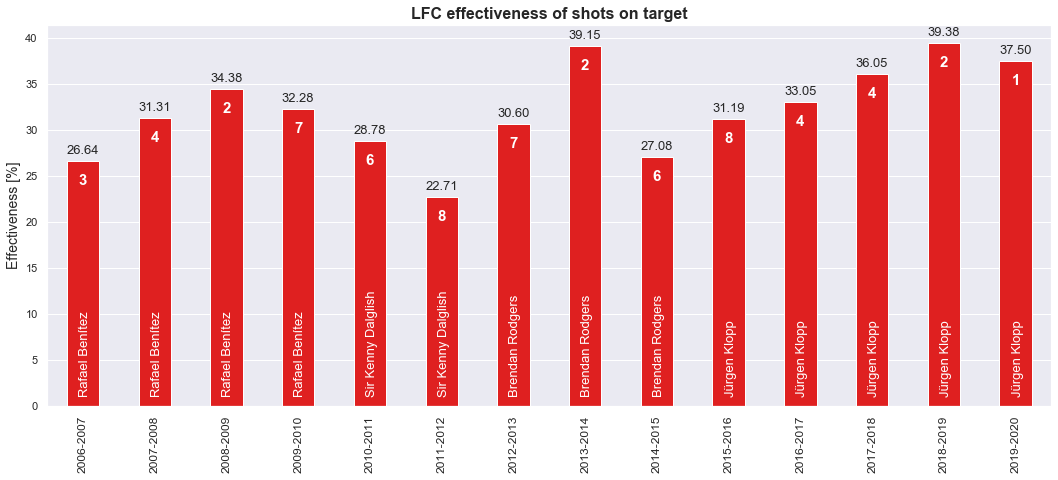

In [28]:
# WYKRES KOLUMNOWY
plt.figure(figsize=(18,7))
sns.set(style='darkgrid')
plot = sns.barplot(data=lfc_eff, x=lfc_eff['season'], y=lfc_eff['goals_acc [%]'], color='red')
plt.xlabel('')
plt.ylabel('Effectiveness [%]', size=14)
plt.xticks(rotation='vertical', size=12)
plt.title('LFC effectiveness of shots on target', weight='bold', size=16)

## Szerokość słupków oraz adnotacje
def new_params(ax, new_value):
    i = 0
    for p in plot.patches:
        curr_width = p.get_width()
        diff = curr_width - new_value
        # zmiana szerokości
        p.set_width(new_value)
        # osiowanie słupków
        p.set_x(p.get_x() + diff * 0.5)
        # adnotacje:
        # - wynik procentowy
        plot.annotate(format(float(p.get_height()), '.2f'), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', 
                     va='center', xytext=(0,10), textcoords='offset points', size=13)
        # - pozycja na koniec sezonu
        plot.annotate(format(lfc_eff['place'][i]), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', 
                     va='center', xytext=(0,-20), textcoords='offset points', weight='bold', size=15, color='white')
        # - nazwisko trenera
        plot.annotate(format(lfc_eff['coach'][i]), (p.get_x() + p.get_width() / 2, 1), ha='center', 
                     va='bottom', xytext=(2,0), textcoords='offset points', size=13, color='white',
                     rotation='vertical')
        i += 1
        
new_params(plot, 0.45)

#save_plot('LFC_effectiveness_of_shots_on_target')
plt.show()

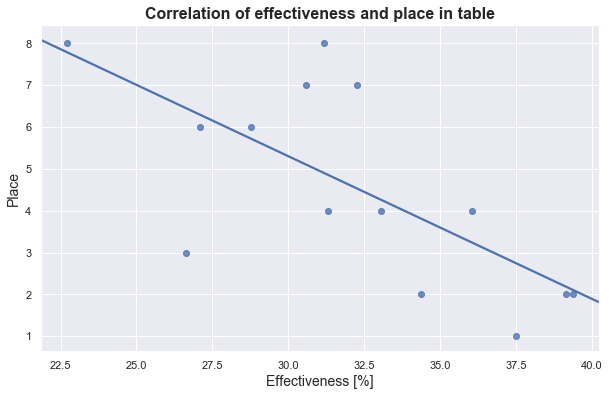

In [29]:
# WYKRES ZALEŻNOŚCI
plt.figure(figsize=(10,6))
sns.set(style='darkgrid')
plot = sns.regplot(data=lfc_eff, x='goals_acc [%]', y='place', ci=None)
plt.xlabel('Effectiveness [%]', size=14)
plt.ylabel('Place', size=14)
plt.title('Correlation of effectiveness and place in table', weight='bold', size=16)

#save_plot('Correlation_of_effectiveness_and_place_in_table')
plt.show()

**Podsumowanie**

In [30]:
# Skuteczność Liverpoolu ogółem
lfc_eff_general = eff.index[eff['team']=='Liverpool']
print('Skuteczność Liverpoolu ogółem:', eff['goals_acc [%]'][lfc_eff_general[0]], '% (', lfc_eff_general[0], 'miejsce )')

# Sezon o najwyższej skuteczności
lfc_eff_max = max(lfc_eff['goals_acc [%]'])
lfc_eff_max_idx = lfc_eff.index[lfc_eff['goals_acc [%]']==lfc_eff_max]
print('Sezon o najwyższej skuteczności:', lfc_eff['season'][lfc_eff_max_idx[0]], '(', lfc_eff['goals_acc [%]'][lfc_eff_max_idx[0]], 
      '%,', lfc_eff['coach'][lfc_eff_max_idx[0]], ' )')
print()

# Współczynnik korelacji Pearsona pomiędzy miejscem w tabeli a skutecznością
print('Zależność pomiędzy miejscem w tabeli a skutecznością:')
correlation = np.corrcoef(lfc_eff['place'], lfc_eff['goals_acc [%]'])
print('- współczynnik korelacji:', round(correlation[0,1], 2))

Skuteczność Liverpoolu ogółem: 32.31 % ( 6 miejsce )
Sezon o najwyższej skuteczności: 2018-2019 ( 39.38 %, Jürgen Klopp  )

Zależność pomiędzy miejscem w tabeli a skutecznością:
- współczynnik korelacji: -0.69


**Wnioski** 

W ogólnym rozrachunku Liverpool z wynikiem 32.31% plasuje się na 6 miejscu pod względem skuteczności. Nie jest to zły wynik, ale na pewno apetyty w tak utytułowanym klubie są zdecydowanie większe.

Patrząc na poszczególne lata, najwyższy procent skuteczności The Reds osiągnęli w zeszłym sezonie (39.38%), kiedy to zajęli drugie miejsce w lidze, przegrywając wyścig o mistrzostwo z Manchesterem City zaledwie o punkt. Z kolei najgorszy wynik to kampania 2011/2012 i koniec rozgrywek na 8 miejscu, co było najniższą lokatą spośród wszystkich analizowanych sezonów.

Warto zauważyć tendencję wzrostową począwszy od sezonu 2014/2015. Zdecydowaną poprawę jakości w wykańczaniu akcji The Reds notują pod wodzą Jurgena Kloppa. Co prawda w porównaniu do zeszłego roku wynik w obecnym sezonie pogorszył się, ale nadal jest on jednym z najwyższych w ostatnich latach. Należy również pamiętać, że rozgrywki jeszcze się nie zakończyły i ciągle może on ulec poprawie.

Ponadto, istnieje dość silna korelacja pomiędzy skutecznością a pozycją w tabeli. Współczynnik korelacji Pearsona wynosi tutaj -0.69 i jest to korelacja ujemna, która w tym przypadku oznacza, że wzrost skuteczności przekłada się na wyższe miejsce na koniec sezonu.

### *Z kim po drodze, a komu lepiej w drogę nie wchodzić*

Skupmy się teraz na rywalach i spróbujmy znaleźć taki zespół, z którym drużynie Liverpoolu gra się zdecydowanie najlepiej oraz drugi, z którym konfrontacje nie należą do przyjemnych.

**Filtrowanie danych**

In [31]:
# Mecze tylko z udziałem Liverpoolu
lfc_results = results.copy()
lfc_results = lfc_results.query('home_team == "Liverpool" or away_team == "Liverpool"')

# Utworzenie kolumny z rywalami Liverpoolu w poszczególnych meczach
lfc_results.loc[lfc_results['home_team']!='Liverpool', 'LFC_opponent'] = lfc_results['home_team']
lfc_results.loc[lfc_results['away_team']!='Liverpool', 'LFC_opponent'] = lfc_results['away_team']

# Utworzenie kolumny z wynikami Liverpoolu w poszczególnych meczach
lfc_results.loc[(lfc_results['home_team']=='Liverpool') & (lfc_results['result']=='H'), 'LFC_result'] = 'W'
lfc_results.loc[(lfc_results['home_team']=='Liverpool') & (lfc_results['result']=='A'), 'LFC_result'] = 'L'
lfc_results.loc[lfc_results['result']=='D', 'LFC_result'] = 'D'
lfc_results.loc[(lfc_results['away_team']=='Liverpool') & (lfc_results['result']=='A'), 'LFC_result'] = 'W'
lfc_results.loc[(lfc_results['away_team']=='Liverpool') & (lfc_results['result']=='H'), 'LFC_result'] = 'L'

# Podsumowanie wyników z poszczególnymi rywalami
lfc_results = lfc_results.groupby(['LFC_opponent', 'LFC_result']).agg({'LFC_result':'count'})
lfc_results = lfc_results.rename(columns={'LFC_result':'summary'})
lfc_results = lfc_results.unstack()

# Zastąpienie wartości nieznanych NaN przez 0:
lfc_results = lfc_results.fillna(value=0)

# Liczba meczów rozegranych z poszczególnymi rywalami
lfc_results['games'] = lfc_results['summary']['D'] + lfc_results['summary']['L'] + lfc_results['summary']['W']

# Liczba punktów zdobytych z poszczególnymi rywalami
lfc_results['pts'] = lfc_results['summary']['D'] * 1 + lfc_results['summary']['W'] * 3

# Liczba wszystkich możliwych punktów do zdobycia
lfc_results['total_pts'] = (lfc_results['summary']['D'] + lfc_results['summary']['L'] 
                                   + lfc_results['summary']['W']) * 3

# Procent meczów zakończonych remisem
lfc_results['D_perc [%]'] = lfc_results['summary']['D'] / lfc_results['games'] * 100

# Procent porażek
lfc_results['L_perc [%]'] = lfc_results['summary']['L'] / lfc_results['games'] * 100

# Procent zwycięstw
lfc_results['W_perc [%]'] = lfc_results['summary']['W'] / lfc_results['games'] * 100

# Średnia punktów zdobytych z poszczególnymi rywalami
lfc_results['pts_avg'] = (lfc_results['summary']['D'] * 1 + lfc_results['summary']['W'] * 3) / lfc_results['games']

# Procent zdobytych punktów
lfc_results['pts_perc [%]'] = lfc_results['pts'] / lfc_results['total_pts'] * 100
lfc_results = lfc_results.sort_values(by=['pts_perc [%]', 'games'], ascending=False)

**Wizualizacja**

<Figure size 432x288 with 0 Axes>

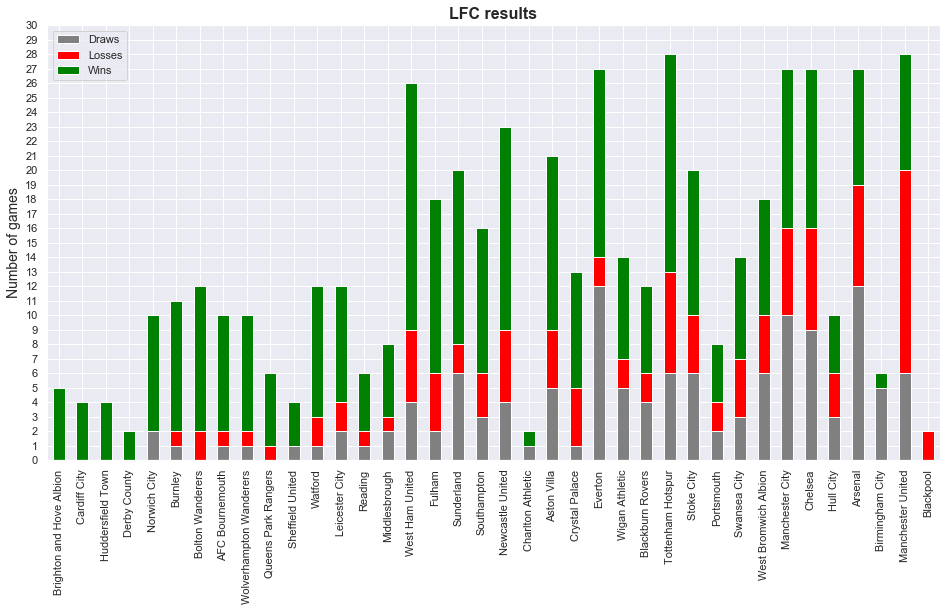

In [32]:
# WYKRES KOLUMNOWY SUMOWANY
labels = ['Draws', 'Losses', 'Wins']
colors = ['grey', 'red', 'green']

plt.figure()
sns.set(style='darkgrid')
plot = lfc_results['summary'].plot(kind='bar', stacked=True, figsize=(16, 8), color=colors)
plt.xlabel('')
plt.ylabel('Number of games', size=14)
plt.yticks([x for x in range(0, 31, 1)])
plt.title('LFC results', weight='bold', size=16)

h, l = plot.get_legend_handles_labels()
plt.legend(h, labels)

#save_plot('LFC_results')
plt.show()

**Podsumowanie**

In [33]:
# Pięć zespołów, z którymi Liverpool osiąga najlepsze wyniki
lfc_results.head()

summary           games   pts total_pts D_perc [%]  \
LFC_result                     D    L    W                                    
LFC_opponent                                                                  
Brighton and Hove Albion     0.0  0.0  5.0   5.0  15.0      15.0        0.0   
Cardiff City                 0.0  0.0  4.0   4.0  12.0      12.0        0.0   
Huddersfield Town            0.0  0.0  4.0   4.0  12.0      12.0        0.0   
Derby County                 0.0  0.0  2.0   2.0   6.0       6.0        0.0   
Norwich City                 2.0  0.0  8.0  10.0  26.0      30.0       20.0   

                         L_perc [%] W_perc [%] pts_avg pts_perc [%]  
LFC_result                                                           
LFC_opponent                                                         
Brighton and Hove Albion        0.0      100.0     3.0       100.00  
Cardiff City                    0.0      100.0     3.0       100.00  
Huddersfield Town               0.0      100.0     3.0       100.00  
Derby County                    0.0      100.0     3.0       100.00  
Norwich City                    0.0       80.0     2.6        86.67

In [34]:
# Pięć zespołów, z którymi Liverpool osiąga najgorsze wyniki
lfc_results.tail()

summary            games   pts total_pts D_perc [%]  \
LFC_result              D     L    W                                    
LFC_opponent                                                            
Hull City             3.0   3.0  4.0  10.0  15.0      30.0      30.00   
Arsenal              12.0   7.0  8.0  27.0  36.0      81.0      44.44   
Birmingham City       5.0   0.0  1.0   6.0   8.0      18.0      83.33   
Manchester United     6.0  14.0  8.0  28.0  30.0      84.0      21.43   
Blackpool             0.0   2.0  0.0   2.0   0.0       6.0       0.00   

                  L_perc [%] W_perc [%] pts_avg pts_perc [%]  
LFC_result                                                    
LFC_opponent                                                  
Hull City              30.00      40.00    1.50        50.00  
Arsenal                25.93      29.63    1.33        44.44  
Birmingham City         0.00      16.67    1.33        44.44  
Manchester United      50.00      28.57    1.07        35.71  
Blackpool             100.00       0.00    0.00         0.00

**Wnioski** 

Analizując powyższe wyniki nie wystarczy jedynie uwzględnić procentu zdobytych punktów z poszczególnymi rywalami. W celu wyciągnięcia sensownych wniosków należy wziąć pod uwagę także liczbę rozegranych spotkań. I tak, zespół Liverpoolu najgorzej wypada w rywalizacji z Manchesterem United. W ostatnich 14 latach derby północno-zachodniej Anglii (ang. North West Derby) miały miejsce w sumie 28 razy z czego drużyna z miasta Beatlesów wygrała 8 spotkań (28.57%), 6-krotnie padł remis (21.43%), a aż 14 razy (50%) komplet punktów zostawał w Manchesterze. Bez dwóch zdań można stwierdzić, że Czerwone Diabły są najtrudniejszym rywalem w ligowej stawce.

Na szczęście są również ekipy, z którymi The Reds radzą sobie o zdecydowanie lepiej. Do tej pory podopieczni Jurgena Kloppa nie zaznali goryczy porażki z Birmingham, Brighton, Cardiff, Charlton, Derby, Huddersfield, Norwich i Sheffield. Uwzględniając liczbę meczów oraz zdobyte punkty, zdecydowanie najlepiej wygląda bilans spotkań z zespołem Norwich, gdzie na 10 spotkań The Reds zanotowali jedynie 2 remisy a 8 razy odnosili zwycięstwo. Przekłada się to na zdobycz w postaci 26 na 30 możliwych punktów (86.67%).

### *Big Six*

Termin Big Six dotyczy sezonów po roku 2010, kiedy to Tottenham po raz pierwszy wdarł się do czołowej czwórki sezonu, kończąc w ten sposób dominację Arsenalu, Chelsea, Liverpoolu i Manchesteru United. Od tamtej pory zarówno on, jak i Manchester City regularnie zajmują miejsca w czubie tabeli, stąd zdecydowano się zamienić dotychczasowe określenie Top Four na Big Six właśnie.

Poniżej sprawdzimy jak w rywalizacji tej szóstki wypada Liverpool. Do tego celu stworzymy tzw. małą tabelę, a także poszukamy zespołu, z którym Czerwoni punktują najlepiej.

**Filtrowanie danych**

In [35]:
big_six = ["Arsenal", "Chelsea", "Liverpool", "Manchester City", "Manchester United", "Tottenham Hotspur"]

# Mecze z udziałem zespołów z Big Six
big_six_results = results.copy()
big_six_results = big_six_results.query(f'home_team in {big_six} or away_team in {big_six}')

# Utworzenie kolumn z liczbą punktów drużyn z Big Six w poszczególnych meczach
# - Arsenal:
big_six_results.loc[(big_six_results['home_team']==big_six[0]) & (big_six_results['result']=='H'), f'{big_six[0]}'] = 3
big_six_results.loc[(big_six_results['away_team']==big_six[0]) & (big_six_results['result']=='A'), f'{big_six[0]}'] = 3
big_six_results.loc[((big_six_results['home_team']==big_six[0]) | (big_six_results['away_team']==big_six[0])) & 
                    (big_six_results['result']=='D'), f'{big_six[0]}'] = 1
big_six_results[big_six[0]] = big_six_results[big_six[0]].fillna(value=0) #Zastąpienie wartości nieznanych NaN przez 0
# - Chelsea:
big_six_results.loc[(big_six_results['home_team']==big_six[1]) & (big_six_results['result']=='H'), f'{big_six[1]}'] = 3
big_six_results.loc[(big_six_results['away_team']==big_six[1]) & (big_six_results['result']=='A'), f'{big_six[1]}'] = 3
big_six_results.loc[((big_six_results['home_team']==big_six[1]) | (big_six_results['away_team']==big_six[1])) & 
                    (big_six_results['result']=='D'), f'{big_six[1]}'] = 1
big_six_results[big_six[1]] = big_six_results[big_six[1]].fillna(value=0) #Zastąpienie wartości nieznanych NaN przez 0
# - Liverpool:
big_six_results.loc[(big_six_results['home_team']==big_six[2]) & (big_six_results['result']=='H'), f'{big_six[2]}'] = 3
big_six_results.loc[(big_six_results['away_team']==big_six[2]) & (big_six_results['result']=='A'), f'{big_six[2]}'] = 3
big_six_results.loc[((big_six_results['home_team']==big_six[2]) | (big_six_results['away_team']==big_six[2])) & 
                    (big_six_results['result']=='D'), f'{big_six[2]}'] = 1
big_six_results[big_six[2]] = big_six_results[big_six[2]].fillna(value=0) #Zastąpienie wartości nieznanych NaN przez 0
# - Manchester City:
big_six_results.loc[(big_six_results['home_team']==big_six[3]) & (big_six_results['result']=='H'), f'{big_six[3]}'] = 3
big_six_results.loc[(big_six_results['away_team']==big_six[3]) & (big_six_results['result']=='A'), f'{big_six[3]}'] = 3
big_six_results.loc[((big_six_results['home_team']==big_six[3]) | (big_six_results['away_team']==big_six[3])) & 
                    (big_six_results['result']=='D'), f'{big_six[3]}'] = 1
big_six_results[big_six[3]] = big_six_results[big_six[3]].fillna(value=0) #Zastąpienie wartości nieznanych NaN przez 0
# - Manchester United:
big_six_results.loc[(big_six_results['home_team']==big_six[4]) & (big_six_results['result']=='H'), f'{big_six[4]}'] = 3
big_six_results.loc[(big_six_results['away_team']==big_six[4]) & (big_six_results['result']=='A'), f'{big_six[4]}'] = 3
big_six_results.loc[((big_six_results['home_team']==big_six[4]) | (big_six_results['away_team']==big_six[4])) & 
                    (big_six_results['result']=='D'), f'{big_six[4]}'] = 1
big_six_results[big_six[4]] = big_six_results[big_six[4]].fillna(value=0) #Zastąpienie wartości nieznanych NaN przez 0
# - Tottenham:
big_six_results.loc[(big_six_results['home_team']==big_six[5]) & (big_six_results['result']=='H'), f'{big_six[5]}'] = 3
big_six_results.loc[(big_six_results['away_team']==big_six[5]) & (big_six_results['result']=='A'), f'{big_six[5]}'] = 3
big_six_results.loc[((big_six_results['home_team']==big_six[5]) | (big_six_results['away_team']==big_six[5])) & 
                    (big_six_results['result']=='D'), f'{big_six[5]}'] = 1
big_six_results[big_six[5]] = big_six_results[big_six[5]].fillna(value=0) #Zastąpienie wartości nieznanych NaN przez 0

In [36]:
# Utworzenie tabeli punktowej dla drużyn z Big Six w formie DataFrame
big_six_pts = big_six_results.loc[:, big_six[0]:].sum().tolist()
big_six_table = pd.DataFrame(columns=['team', 'points'])
big_six_table['team'] = big_six
big_six_table['points'] = big_six_pts
big_six_table = big_six_table.sort_values(by='points', ascending=False)

In [37]:
# Podsumowanie wyników LFC z zespołami z Big Six
lfc_big_six_results = lfc_results.query(f'LFC_opponent in {big_six}')

**Wizualizacja**

<Figure size 432x288 with 0 Axes>

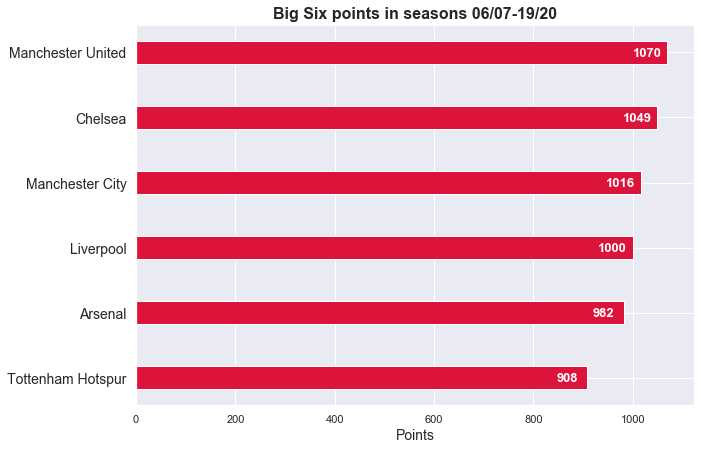

In [38]:
# WYKRES SŁUPKOWY POZIOMY
big_six_table = big_six_table.sort_values(by='points')

plt.figure()
sns.set(style='darkgrid')
plot = big_six_table.plot(kind='barh', figsize=(10,7), color='crimson', width=0.35, legend=False)
plt.xlabel('Points', size=14)
plt.ylabel('')
plot.set_yticklabels(big_six_table['team'], size=14)
plt.title('Big Six points in seasons 06/07-19/20', weight='bold', size=16)

# Adnotacje
for p in plot.patches:
    plot.annotate(format(int(p.get_width()), 'd'), (p.get_width(), p.get_y() + p.get_height() / 2.5), ha = 'center', 
                   va = 'center', xytext=(-20,1), textcoords='offset points', size=13, color='white', weight='bold')

#save_plot('Big_Six_points_in_seasons_06/07-19/20')
plt.show()

<Figure size 432x288 with 0 Axes>

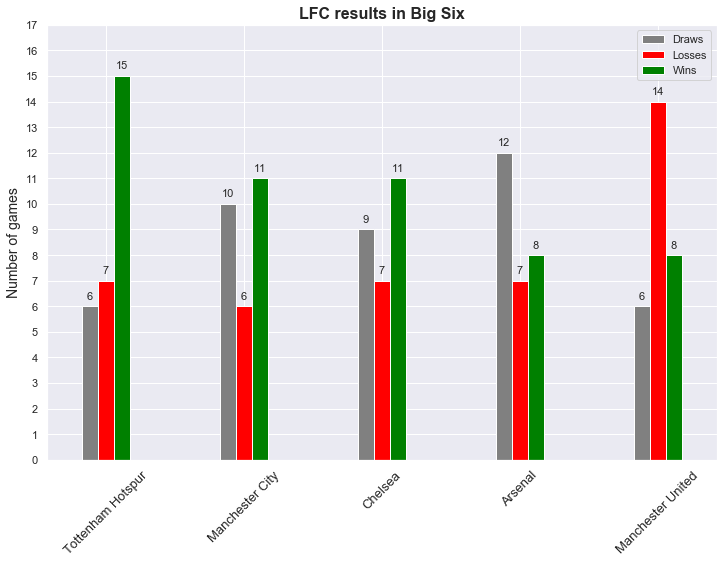

In [39]:
# WYKRES KOLUMNOWY GRUPOWANY
labels = ['Draws', 'Losses', 'Wins']
colors = ['grey', 'red', 'green']

plt.figure()
sns.set(style='darkgrid')
plot = lfc_big_six_results['summary'].plot(kind='bar', figsize=(12, 8), color=colors, width=0.35)
plt.xlabel('')
plt.ylabel('Number of games', size=14)
plt.xticks(size=13, rotation=45)
plt.yticks([x for x in range(0, 18, 1)])
plt.title('LFC results in Big Six', weight='bold', size=16)

h, l = plot.get_legend_handles_labels()
plt.legend(h, labels)

## Adnotacje
for p in plot.patches:
    plot.annotate(format(int(p.get_height())), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', 
                     va='center', xytext=(0,10), textcoords='offset points', size=11)      

#save_plot('LFC_results_in_Big_Six')
plt.show()

**Podsumowanie**

In [56]:
# Mała tabela dla zespołów z Big Six w sezonach 06/07-19/20
big_six_table = big_six_table.sort_values(by='points', ascending=False)
big_six_table

,team,points
4,Manchester United,1070.0
1,Chelsea,1049.0
3,Manchester City,1016.0
2,Liverpool,1000.0
0,Arsenal,982.0
5,Tottenham Hotspur,908.0


In [41]:
# Wyniki LFC z drużynami z Big Six
lfc_big_six_results

summary             games   pts total_pts D_perc [%]  \
LFC_result              D     L     W                                    
LFC_opponent                                                             
Tottenham Hotspur     6.0   7.0  15.0  28.0  51.0      84.0      21.43   
Manchester City      10.0   6.0  11.0  27.0  43.0      81.0      37.04   
Chelsea               9.0   7.0  11.0  27.0  42.0      81.0      33.33   
Arsenal              12.0   7.0   8.0  27.0  36.0      81.0      44.44   
Manchester United     6.0  14.0   8.0  28.0  30.0      84.0      21.43   

                  L_perc [%] W_perc [%] pts_avg pts_perc [%]  
LFC_result                                                    
LFC_opponent                                                  
Tottenham Hotspur      25.00      53.57    1.82        60.71  
Manchester City        22.22      40.74    1.59        53.09  
Chelsea                25.93      40.74    1.56        51.85  
Arsenal                25.93      29.63    1.33        44.44  
Manchester United      50.00      28.57    1.07        35.71

**Wnioski**

W zestawieniu punktowym prowadzą Czerwone Diabły, co nie jest zaskoczeniem z uwagi na fakt, że od 2006 roku zdobywały one mistrzostwo 5-krotnie. Druga jest Chelsea (3-krotnie), a podium zamyka Manchester City (4 razy). Liverpool, Arsenal i Tottenham nie zdobyły tytułu w ostatnich latach ani razu, co znajduje swoje odzwierciedlenie w powyższych wynikach. Co więcej, zespół z Anfield dał się wyprzedzić The Citizens, którzy tak na dobrą sprawę rozgościli się w czołówce dopiero w roku 2011.

Najgorszy bilans The Reds mają oczywiście z Manchesterem United. Z kolei najlepiej wygląda ich konfrontacja z Tottenhamem, w której to wygrali ponad połowę meczów (53.57%). Również tutaj nie bez znaczenia pozostaje fakt, że zespół Spurs długo pozostawał ligowym średniakiem i dopiero niedawno stał się zespołem walczącym o najwyższe cele.

### *Wzloty i upadki*

Sezon piłkarski jest długi i wyczerpujący, dlatego przeanalizujmy jakie średnie wyniki notuje drużyna Czerwonych w trakcie trwania rozgrywek.

**Filtrowanie danych**

In [42]:
# Słownik dla miesięcy i rozgrywanych w nich numerów kolejek (rund)
months = {'Aug':[1,2,3], 'Sep':[4,5,6,7], 'Oct':[8,9,10], 'Nov':[11,12,13], 'Dec':[14,15,16,17,18,19,20], 
          'Jan':[21,22,23,24], 'Feb':[25,26,27,28], 'Mar':[29,30,31,32], 'Apr':[33,34,35,36], 'May':[37,38]}

# Mecze z udziałem Liverpoolu
lfc_season_results = results.copy()
lfc_season_results = lfc_season_results.query('home_team == "Liverpool" or away_team == "Liverpool"')

# Wyniki Liverpoolu
lfc_season_results.loc[(lfc_season_results['home_team']=='Liverpool') & (lfc_season_results['result']=='H'), 'LFC_result'] = 'W'
lfc_season_results.loc[(lfc_season_results['home_team']=='Liverpool') & (lfc_season_results['result']=='A'), 'LFC_result'] = 'L'
lfc_season_results.loc[lfc_season_results['result']=='D', 'LFC_result'] = 'D'
lfc_season_results.loc[(lfc_season_results['away_team']=='Liverpool') & (lfc_season_results['result']=='A'), 'LFC_result'] = 'W'
lfc_season_results.loc[(lfc_season_results['away_team']=='Liverpool') & (lfc_season_results['result']=='H'), 'LFC_result'] = 'L'

# Kolumna z numerem kolejki
lfc_season_results['round'] = lfc_season_results.groupby(['season']).cumcount()+1

# Kolumna z miesiącem rozgrywania kolejki
lfc_season_results.loc[lfc_season_results['round'].isin(months['Aug']), 'month'] = list(months.keys())[0]
lfc_season_results.loc[lfc_season_results['round'].isin(months['Sep']), 'month'] = list(months.keys())[1]
lfc_season_results.loc[lfc_season_results['round'].isin(months['Oct']), 'month'] = list(months.keys())[2]
lfc_season_results.loc[lfc_season_results['round'].isin(months['Nov']), 'month'] = list(months.keys())[3]
lfc_season_results.loc[lfc_season_results['round'].isin(months['Dec']), 'month'] = list(months.keys())[4]
lfc_season_results.loc[lfc_season_results['round'].isin(months['Jan']), 'month'] = list(months.keys())[5]
lfc_season_results.loc[lfc_season_results['round'].isin(months['Feb']), 'month'] = list(months.keys())[6]
lfc_season_results.loc[lfc_season_results['round'].isin(months['Mar']), 'month'] = list(months.keys())[7]
lfc_season_results.loc[lfc_season_results['round'].isin(months['Apr']), 'month'] = list(months.keys())[8]
lfc_season_results.loc[lfc_season_results['round'].isin(months['May']), 'month'] = list(months.keys())[9]

# Suma wyników w poszczególnych miesiącach
lfc_season_results = lfc_season_results.groupby(['month', 'LFC_result']).agg({'LFC_result':'count'})
lfc_season_results = lfc_season_results.rename(columns={'LFC_result':'total'})
lfc_season_results = lfc_season_results.unstack()

# Liczba meczów ogółem w poszczególnych miesiącach
lfc_season_results['total_games'] = (lfc_season_results['total']['D'] + lfc_season_results['total']['L'] + 
                                     lfc_season_results['total']['W'])

# Średnia punktów w każdym miesiącu
lfc_season_results['avg_pts'] = (lfc_season_results['total']['D'] * 1 + lfc_season_results['total']['L'] * 0 + 
                                 lfc_season_results['total']['W'] * 3) / lfc_season_results['total_games']

# Procent meczów zakończonych remisem
lfc_season_results['D_perc [%]'] = lfc_season_results['total']['D'] / lfc_season_results['total_games'] * 100

# Procent meczów zakończonych porażką
lfc_season_results['L_perc [%]'] = lfc_season_results['total']['L'] / lfc_season_results['total_games'] * 100

# Procent meczów zakończonych zwycięstwem
lfc_season_results['W_perc [%]'] = lfc_season_results['total']['W'] / lfc_season_results['total_games'] * 100

# Zmiana kolejności na zgodną z biegiem sezonu
lfc_season_results = lfc_season_results.reindex(list(months.keys()))
lfc_season_results = lfc_season_results.reset_index()

**Wizualizacja**

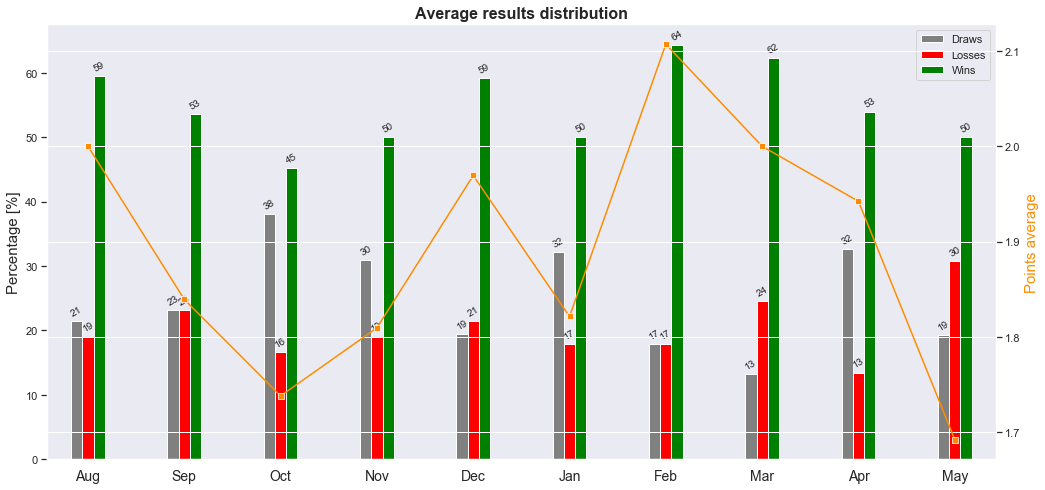

In [43]:
labels = ['Draws', 'Losses', 'Wins']
colors = ['grey', 'red', 'green']

# Multiplot:
# - WYKRES KOLUMNOWY GRUPOWANY
ax1 = lfc_season_results.plot(x='month', y=['D_perc [%]','L_perc [%]','W_perc [%]'], kind='bar', figsize=(17, 8), 
                              color=colors, width=0.35)
ax1.set_xlabel('')
ax1.set_ylabel('Percentage [%]', size=15)
ax1.set_xticklabels(lfc_season_results['month'], size=14, rotation=0)
ax1.set_title('Average results distribution', weight='bold', size=16)
ax1.grid(False)

h, l = ax1.get_legend_handles_labels()
ax1.legend(h, labels)

## Adnotacje
for p in ax1.patches:
    ax1.annotate(format(int(p.get_height())), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', 
                     va='center', xytext=(0,10), textcoords='offset points', size=10, rotation=30)     

# - WYKRES LINIOWY
ax2 = ax1.twinx()
ax2 = sns.lineplot(data=lfc_season_results, x='month', y='avg_pts', sort=False, marker='s', color='darkorange')
ax2.set_ylabel('Points average', size=15, color='darkorange')

#save_plot('Average_results_distribution')
plt.show()

**Podsumowanie**

In [44]:
# Miesiąc o najwyższej średniej punktów
max_month_avg_pts = max(lfc_season_results['avg_pts'])
max_month_avg_pts_idx = lfc_season_results.index[lfc_season_results['avg_pts']==max_month_avg_pts]
for i in max_month_avg_pts_idx:
    print('Miesiąc o najwyższej średniej punktów:', lfc_season_results['month'][i], '(', round(max_month_avg_pts, 2), ' )')

# Miesiąc o najwyższym odsetku zwycięstw
max_month_w_perc = max(lfc_season_results['W_perc [%]'])
max_month_w_perc_idx = lfc_season_results.index[lfc_season_results['W_perc [%]']==max_month_w_perc]
for i in max_month_w_perc_idx:
    print('Miesiąc o najwyższym odsetku zwycięstw:', lfc_season_results['month'][i], '(', round(max_month_w_perc, 2), '% )')

# Miesiąc o najwyższym odsetku remisów
max_month_d_perc = max(lfc_season_results['D_perc [%]'])
max_month_d_perc_idx = lfc_season_results.index[lfc_season_results['D_perc [%]']==max_month_d_perc]
for i in max_month_d_perc_idx:
    print('Miesiąc o najwyższym odsetku remisów:', lfc_season_results['month'][i], '(', round(max_month_d_perc, 2), '% )')

# Miesiąc o najwyższym odsetku porażek
max_month_l_perc = max(lfc_season_results['L_perc [%]'])
max_month_l_perc_idx = lfc_season_results.index[lfc_season_results['L_perc [%]']==max_month_l_perc]
for i in max_month_l_perc_idx:
    print('Miesiąc o najwyższym odsetku porażek:', lfc_season_results['month'][i], '(', round(max_month_l_perc, 2), '% )')
print()

# Miesiąc o najniższej średniej punktów
min_month_avg_pts = min(lfc_season_results['avg_pts'])
min_month_avg_pts_idx = lfc_season_results.index[lfc_season_results['avg_pts']==min_month_avg_pts]
for i in min_month_avg_pts_idx:
    print('Miesiąc o najniższej średniej punktów:', lfc_season_results['month'][i], '(', round(min_month_avg_pts, 2), ' )')

# Miesiąc o najniższym odsetku zwycięstw
min_month_w_perc = min(lfc_season_results['W_perc [%]'])
min_month_w_perc_idx = lfc_season_results.index[lfc_season_results['W_perc [%]']==min_month_w_perc]
for i in min_month_w_perc_idx:
    print('Miesiąc o najniższym odsetku zwycięstw:', lfc_season_results['month'][i], '(', round(min_month_w_perc, 2), '% )')

# Miesiąc o najniższym odsetku remisów
min_month_d_perc = min(lfc_season_results['D_perc [%]'])
min_month_d_perc_idx = lfc_season_results.index[lfc_season_results['D_perc [%]']==min_month_d_perc]
for i in min_month_d_perc_idx:
    print('Miesiąc o najniższym odsetku remisów:', lfc_season_results['month'][i], '(', round(min_month_d_perc, 2), '% )')

# Miesiąc o najniższym odsetku porażek
min_month_l_perc = min(lfc_season_results['L_perc [%]'])
min_month_l_perc_idx = lfc_season_results.index[lfc_season_results['L_perc [%]']==min_month_l_perc]
for i in min_month_l_perc_idx:
    print('Miesiąc o najniższym odsetku porażek:', lfc_season_results['month'][i], '(', round(min_month_l_perc, 2), '% )')

Miesiąc o najwyższej średniej punktów: Feb ( 2.11  )
Miesiąc o najwyższym odsetku zwycięstw: Feb ( 64.29 % )
Miesiąc o najwyższym odsetku remisów: Oct ( 38.1 % )
Miesiąc o najwyższym odsetku porażek: May ( 30.77 % )

Miesiąc o najniższej średniej punktów: May ( 1.69  )
Miesiąc o najniższym odsetku zwycięstw: Oct ( 45.24 % )
Miesiąc o najniższym odsetku remisów: Mar ( 13.21 % )
Miesiąc o najniższym odsetku porażek: Apr ( 13.46 % )


**Wnioski**

Jak widać pierwsza część sezonu charakteryzuje się mocnym początkiem, ale w kolejnych tygodniach drużyna notuje zwykle znaczny spadek formy, aby na przełomie października i listopada odbić się i zacząć odrabianie strat. Stosunkowo nieźle zespół Liverpoolu radzi sobie w grudniu, który znany jest, jako najbardziej wymagający okres w angielskiej piłce i gdzie gra co 3 dni to chleb powszedni. Dobre rezultaty w czasie świąt Bożego Narodzenia odbijają się jednak na początku nowego roku i styczeń nie jest już tak owocny. Kibice The Reds z utęsknieniem wyczekują na pewno miesięcy wiosennych, gdzie ich pupile, w przekroju całego sezonu, osiągają najwyższą i najbardziej stabilną formę. Maj to już wyraźne rozprężenie, szczególnie że znana jest już zazwyczaj większość rozstrzygnięć.

### *Jurgen Wszechmogący*

Pod wodzą Jurgena Kloppa drużyna wyraźnie poprawiła swoje wyniki i wszyscy w klubie nareszcie mogą realnie myśleć o pierwszym od 30 lat (ostatnie w 1990 roku) mistrzostwie Anglii. Jak jednak wypada niemiecki trener na tle swoich poprzedników?

**Filtrowanie danych**

In [45]:
# Pozycje zajmowane przez poszczególnych trenerów od 1963
lfc_coach_place = lfc_data[['coach', 'place']]

# Liczba zdobytych tytułów
lfc_coach_titles = lfc_coach_place.query('place == 1').groupby('coach').count()
lfc_coach_titles = lfc_coach_titles.reset_index().rename(columns={'place':'titles'})
lfc_coach_titles = lfc_coach_titles.sort_values(by='titles', ascending=False)

In [46]:
# Pozostałe statystyki poszczególnych trenerów
lfc_coach_stats = lfc_data.drop(columns=['place'])

# Podsumowanie poszczególnych kolumn
lfc_coach_stats = lfc_coach_stats.groupby('coach').sum()

# Liczba sezonów na stanowisku trenera
seasons = lfc_data.groupby('coach').count()['season']
lfc_coach_stats.insert(0, 'seasons', seasons)

# Liczba meczów jako trener
games = lfc_coach_stats['W'] + lfc_coach_stats['D'] + lfc_coach_stats['L'] 
lfc_coach_stats.insert(1, 'games', games)

# Procent meczów przegranych
L_perc = lfc_coach_stats['L'] / lfc_coach_stats['games'] * 100
lfc_coach_stats.insert(5, 'L_perc [%]', L_perc)

# Procent meczów zremisowanych
D_perc = lfc_coach_stats['D'] / lfc_coach_stats['games'] * 100
lfc_coach_stats.insert(5, 'D_perc [%]', D_perc)

# Procent meczów wygranych
W_perc = lfc_coach_stats['W'] / lfc_coach_stats['games'] * 100
lfc_coach_stats.insert(5, 'W_perc [%]', W_perc)

# Średnia bramek straconych
goals_conc_avg = lfc_coach_stats['goals_conceded'] / lfc_coach_stats['games']
lfc_coach_stats.insert(11, 'goals_conc_avg', goals_conc_avg)

# Średnia bramek strzelonych
goals_sc_avg = lfc_coach_stats['goals_scored'] / lfc_coach_stats['games']
lfc_coach_stats.insert(11, 'goals_sc_avg', goals_sc_avg)

# Średnia punktów
points_avg = lfc_coach_stats['points'] / lfc_coach_stats['games']
lfc_coach_stats.insert(14, 'points_avg', points_avg)
lfc_coach_stats = lfc_coach_stats.reset_index()

**Wizualizacja**

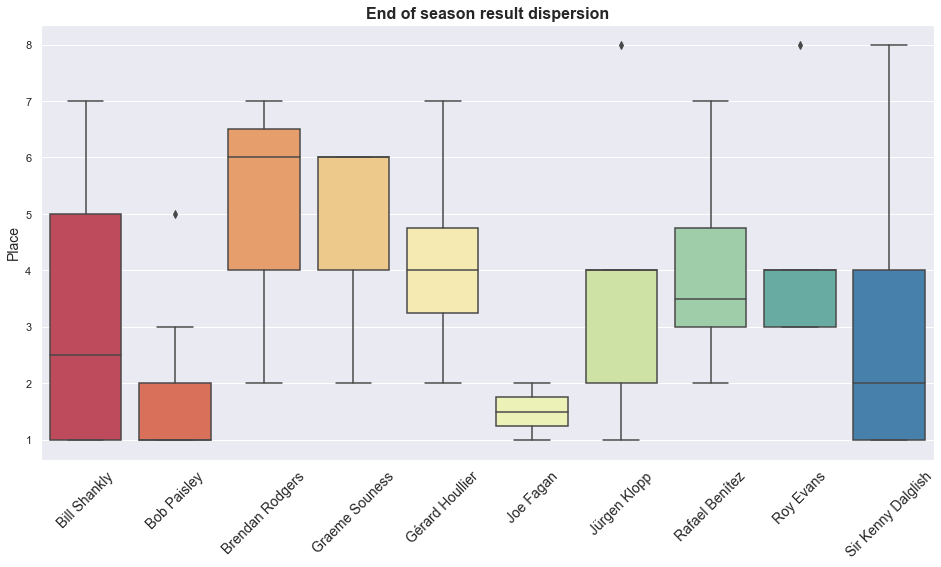

In [47]:
# WYKRES PUDEŁKOWY
plt.figure(figsize=(16,8))
sns.set(style='darkgrid')
plot = sns.boxplot(data=lfc_coach_place, x='coach', y='place', palette='Spectral')
plt.xlabel('')
plt.ylabel('Place', size=14)
plt.xticks(size=14, rotation=45)
plt.title('End of season result dispersion', weight='bold', size=16)

#save_plot('End_of_season_result_dispersion')
plt.show()

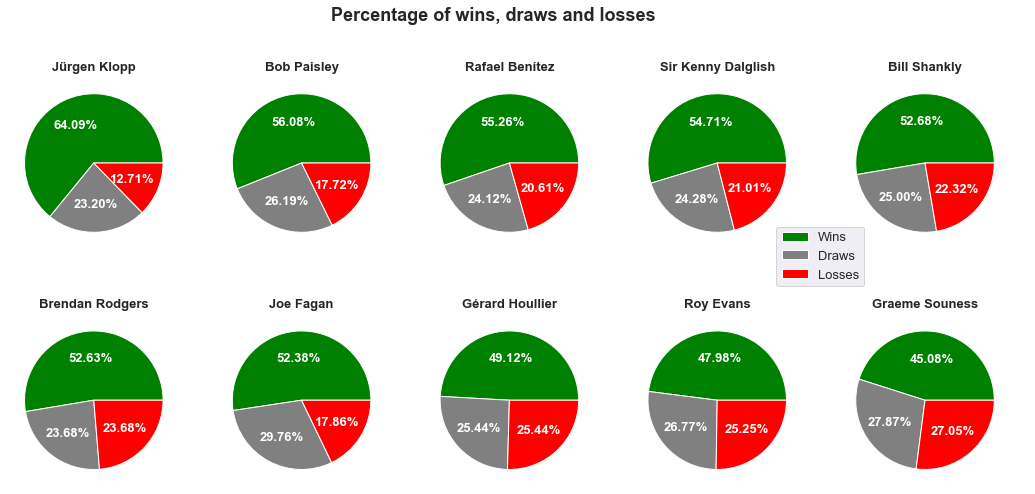

In [48]:
lfc_coach_res = lfc_coach_stats[['coach','W_perc [%]', 'D_perc [%]', 'L_perc [%]']]
lfc_coach_res = lfc_coach_res.sort_values(by='W_perc [%]', ascending=False)
lfc_coach_res = lfc_coach_res.set_index('coach')

labels = ['Wins', 'Draws', 'Losses']
colors = ['green', 'grey', 'red']

# Multiplot
# WYKRESY KOŁOWE
fig, axes = plt.subplots(2, 5, figsize=(18, 8))

for i, (idx, row) in enumerate(lfc_coach_res.iterrows()):
    ax = axes[i // 5, i % 5]
    row = row[row.gt(row.sum() * .01)]
    ax.pie(row, labels=labels, colors=colors, autopct='%1.2f%%', textprops=dict(color="w", size=13, weight='bold'))
    ax.set_title(idx, weight='bold', size=13)

plt.figlegend(labels, loc=(0.75,0.42), prop={'size':13})
plt.suptitle('Percentage of wins, draws and losses', weight='bold', size=18)

#save_plot('Percentage_of_W_D_L')
plt.show()

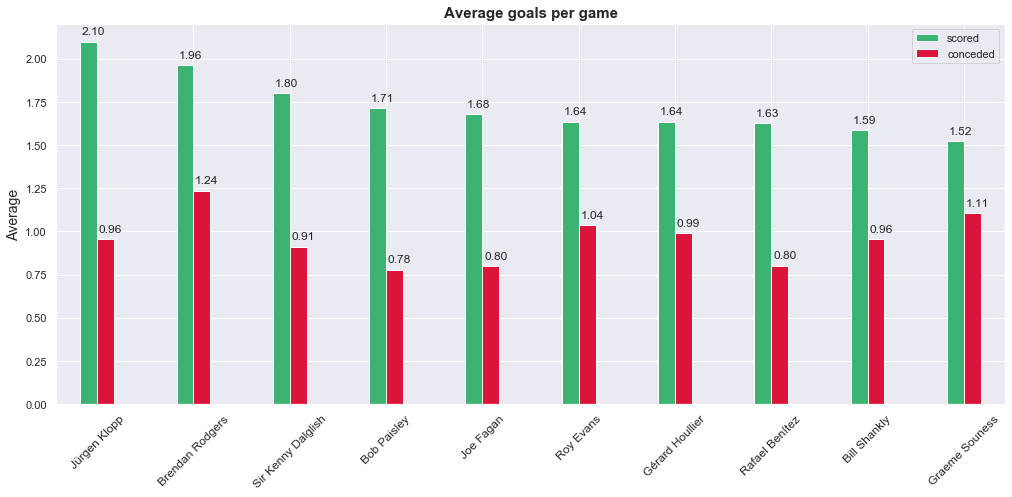

In [49]:
lfc_coach_goals = lfc_coach_stats[['coach', 'goals_sc_avg', 'goals_conc_avg']]
lfc_coach_goals = lfc_coach_goals.sort_values(by='goals_sc_avg', ascending=False)

colors = ['mediumseagreen', 'crimson']
labels = ['scored', 'conceded']

# WYKRES KOLUMNOWY
plot = lfc_coach_goals.plot(x='coach', y=['goals_sc_avg', 'goals_conc_avg'], kind='bar', figsize=(17, 7), color=colors, width=0.35)
plot.set_xlabel('')
plot.set_ylabel('Average', size=14)
plot.set_xticklabels(lfc_coach_goals['coach'], size=12, rotation=45)
plot.set_title('Average goals per game', weight='bold', size=15)

h, l = plot.get_legend_handles_labels()
plot.legend(h, labels)

## Adnotacje
for p in plot.patches:
    plot.annotate(format(float(p.get_height()), '.2f'), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', 
                  va='center', xytext=(5,10), textcoords='offset points', size=12)     

#save_plot('Average_goals_per_game')
plt.show()

<Figure size 432x288 with 0 Axes>

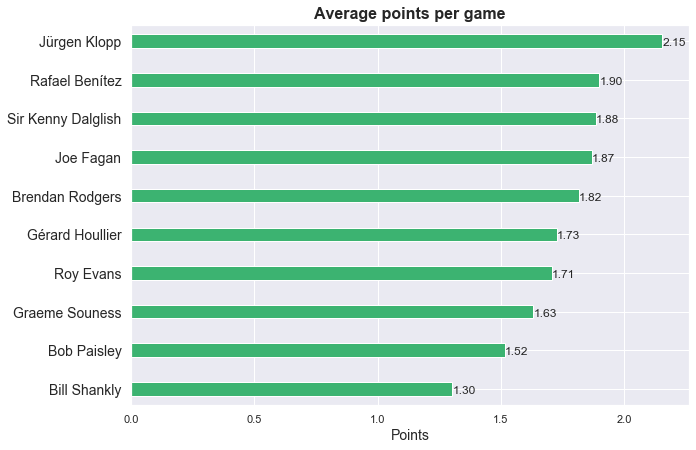

In [50]:
lfc_coach_pts = lfc_coach_stats[['coach', 'points_avg']]
lfc_coach_pts = lfc_coach_pts.sort_values(by='points_avg')

# WYKRES SŁUPKOWY POZIOMY
plt.figure()
sns.set(style='darkgrid')
plot = lfc_coach_pts.plot(kind='barh', figsize=(10,7), color='mediumseagreen', width=0.35, legend=False)
plt.xlabel('Points', size=14)
plt.ylabel('')
plot.set_yticklabels(lfc_coach_pts['coach'], size=14)
plt.title('Average points per game', weight='bold', size=16)

# Adnotacje
for p in plot.patches:
    plot.annotate(format(float(p.get_width()), '.2f'), (p.get_width(), p.get_y() + p.get_height() / 2.5), ha = 'left', 
                   va = 'center', size=12)

#save_plot('Average_points_per_game')
plt.show()

**Podsumowanie**:

In [51]:
# Najwięcej tytułów
most_titles = max(lfc_coach_titles['titles'])
most_titles_idx = lfc_coach_titles.index[lfc_coach_titles['titles']==most_titles]
for i in most_titles_idx:
    print('Najwięcej zdobytych tytułów:', lfc_coach_titles['coach'][i], '(', most_titles, 'tytułów )')
print()

# Najdłużej na stanowisku
most_seasons = max(lfc_coach_stats['seasons'])
most_seasons_idx = lfc_coach_stats.index[lfc_coach_stats['seasons']==most_seasons]
for i in most_seasons_idx:
    print('Najdłużej na stanowisku:', lfc_coach_stats['coach'][i], '(', most_seasons, 'sezonów )')
print()

# Najwyższy procent zwycięstw
high_w_perc = max(lfc_coach_stats['W_perc [%]'])
high_w_perc_idx = lfc_coach_stats.index[lfc_coach_stats['W_perc [%]']==high_w_perc]
for i in high_w_perc_idx:
    print('Najwyższy procent zwycięstw:', lfc_coach_stats['coach'][i], '(', round(high_w_perc, 2), '% )')

# Najwyższy procent remisów
high_d_perc = max(lfc_coach_stats['D_perc [%]'])
high_d_perc_idx = lfc_coach_stats.index[lfc_coach_stats['D_perc [%]']==high_d_perc]
for i in high_d_perc_idx:
    print('Najwyższy procent remisów:', lfc_coach_stats['coach'][i], '(', round(high_d_perc, 2), '% )')

# Najwyższy procent porażek
high_l_perc = max(lfc_coach_stats['L_perc [%]'])
high_l_perc_idx = lfc_coach_stats.index[lfc_coach_stats['L_perc [%]']==high_l_perc]
for i in high_l_perc_idx:
    print('Najwyższy procent porażek:', lfc_coach_stats['coach'][i], '(', round(high_l_perc, 2), '% )')
print()

# Najniższy procent zwycięstw
low_w_perc = min(lfc_coach_stats['W_perc [%]'])
low_w_perc_idx = lfc_coach_stats.index[lfc_coach_stats['W_perc [%]']==low_w_perc]
for i in low_w_perc_idx:
    print('Najniższy procent zwycięstw:', lfc_coach_stats['coach'][i], '(', round(low_w_perc, 2), '% )')

# Najniższy procent remisów
low_d_perc = min(lfc_coach_stats['D_perc [%]'])
low_d_perc_idx = lfc_coach_stats.index[lfc_coach_stats['D_perc [%]']==low_d_perc]
for i in low_d_perc_idx:
    print('Najniższy procent remisów:', lfc_coach_stats['coach'][i], '(', round(low_d_perc, 2), '% )')

# Najniższy procent porażek
low_l_perc = min(lfc_coach_stats['L_perc [%]'])
low_l_perc_idx = lfc_coach_stats.index[lfc_coach_stats['L_perc [%]']==low_l_perc]
for i in low_l_perc_idx:
    print('Najniższy procent porażek:', lfc_coach_stats['coach'][i], '(', round(low_l_perc, 2), '% )')
print()

# Najwyższa średnia bramek strzelonych
high_goals_sc_avg = max(lfc_coach_stats['goals_sc_avg'])
high_goals_sc_avg_idx = lfc_coach_stats.index[lfc_coach_stats['goals_sc_avg']==high_goals_sc_avg]
for i in high_goals_sc_avg_idx:
    print('Najwyższa średnia bramek strzelonych:', lfc_coach_stats['coach'][i], '(', round(high_goals_sc_avg, 2), ')')

# Najwyższa średnia bramek straconych
high_goals_conc_avg = max(lfc_coach_stats['goals_conc_avg'])
high_goals_conc_avg_idx = lfc_coach_stats.index[lfc_coach_stats['goals_conc_avg']==high_goals_conc_avg]
for i in high_goals_conc_avg_idx:
    print('Najwyższa średnia bramek straconych:', lfc_coach_stats['coach'][i], '(', round(high_goals_conc_avg, 2), ')')
print()

# Najniższa średnia bramek strzelonych
low_goals_sc_avg = min(lfc_coach_stats['goals_sc_avg'])
low_goals_sc_avg_idx = lfc_coach_stats.index[lfc_coach_stats['goals_sc_avg']==low_goals_sc_avg]
for i in low_goals_sc_avg_idx:
    print('Najniższa średnia bramek strzelonych:', lfc_coach_stats['coach'][i], '(', round(low_goals_sc_avg, 2), ')')

# Najniższa średnia bramek straconych
low_goals_conc_avg = min(lfc_coach_stats['goals_conc_avg'])
low_goals_conc_avg_idx = lfc_coach_stats.index[lfc_coach_stats['goals_conc_avg']==low_goals_conc_avg]
for i in low_goals_conc_avg_idx:
    print('Najniższa średnia bramek straconych:', lfc_coach_stats['coach'][i], '(', round(low_goals_conc_avg, 2), ')')
print()

# Najwyższa średnia punktów
high_points_avg = max(lfc_coach_stats['points_avg'])
high_points_avg_idx = lfc_coach_stats.index[lfc_coach_stats['points_avg']==high_points_avg]
for i in high_points_avg_idx:
    print('Najwyższa średnia punktów:', lfc_coach_stats['coach'][i], '(', round(high_points_avg, 2), ')')
print()

# Najniższa średnia punktów
low_points_avg = min(lfc_coach_stats['points_avg'])
low_points_avg_idx = lfc_coach_stats.index[lfc_coach_stats['points_avg']==low_points_avg]
for i in low_points_avg_idx:
    print('Najniższa średnia punktów:', lfc_coach_stats['coach'][i], '(', round(low_points_avg, 2), ')')

Najwięcej zdobytych tytułów: Bob Paisley ( 6 tytułów )

Najdłużej na stanowisku: Bob Paisley ( 9 sezonów )

Najwyższy procent zwycięstw: Jürgen Klopp ( 64.09 % )
Najwyższy procent remisów: Joe Fagan ( 29.76 % )
Najwyższy procent porażek: Graeme Souness ( 27.05 % )

Najniższy procent zwycięstw: Graeme Souness ( 45.08 % )
Najniższy procent remisów: Jürgen Klopp ( 23.2 % )
Najniższy procent porażek: Jürgen Klopp ( 12.71 % )

Najwyższa średnia bramek strzelonych: Jürgen Klopp ( 2.1 )
Najwyższa średnia bramek straconych: Brendan Rodgers ( 1.24 )

Najniższa średnia bramek strzelonych: Graeme Souness ( 1.52 )
Najniższa średnia bramek straconych: Bob Paisley ( 0.78 )

Najwyższa średnia punktów: Jürgen Klopp ( 2.15 )

Najniższa średnia punktów: Bill Shankly ( 1.3 )


**Wnioski**

Nikt nie zna planów Jurgena Kloppa na najbliższe lata, ale jeśli Niemiec zdecyduje się zostać na Anfield przez kilka najbliższych sezonów, to ma szansę zapisać się złotymi zgłoskami w historii klubu z czerwonej części Merseyside. Wyniki, które drużyna notuje pod jego wodzą są jednymi z najlepszych nie tylko w ostatnich latach, ale i w ogóle. Podopieczni Kloppa osiągnęli najwyższy odsetek zwycięskich meczów (64.09%) patrząc na dane od 1963 roku. Przekłada się to na najwyższą średnią zdobytych punktów (2.15) oraz strzelonych bramek na mecz (2.1). Mistrzostwo, które Liverpool najpewniej zdobędzie w bieżącym sezonie będzie potwierdzeniem tych wyników. Ostatni raz tak blisko tytułu było przed rokiem, kiedy to zabrakło zaledwie jednego punktu oraz w rozgrywkach 14/15 jeszcze za kadencji Brendana Rodgersa. Widać jednak, że wtedy, pomimo wysokiej skuteczności (średnia bramek strzelonych na poziomie 1.96 - drugi najlepszy wynik) zdecydowanie zawiodła gra w obronie (średnia bramek straconych: 1.24 - wynik najgorszy!). Obecnie droga do pobicia rekordu Boba Paisleya, który jako sternik Liverpoolu zdobył 6 tytułów, wydaje się odległa, ale przy takiej grze Jurgen Klopp na pewno ma na to sporą szansę. 

### *Skąd to wszystko*

Dobre wyniki nie biorą się znikąd, dlatego poszukajmy, w którym aspekcie drużyna notuje progres w stosunku do lat poprzednich.

**Filtrowanie danych**

In [52]:
# Odfiltrowanie statystyk dla samego Liverpoolu
lfc_stats = stats.query('team == "Liverpool"')
lfc_stats = lfc_stats.sort_values(by='id', ascending=False)
lfc_stats = lfc_stats.drop(columns=['id', 'team', 'wins', 'losses', 'season'])

# Odfiltrowanie statystyk dot. sezonów ('lfc_data') starszych niż z roku 2006
seasons = stats['season'].unique().tolist()
lfc_data_from_0607 = lfc_data.loc[lfc_data['season'].isin(seasons)]

# Zastąpienie nazwisk trenerów innych niż Jurgen Klopp poprzez 'Other'
other_coach = lfc_data_from_0607.query('coach != "Jürgen Klopp"')
other_coach_list = other_coach['coach'].unique().tolist()
lfc_data_from_0607 = lfc_data_from_0607.replace(other_coach_list, 'Other')

# Wstawienie nazwiska trenera z 'lfc_data_from_0607' do 'lfc_stats'
coach =lfc_data_from_0607['coach'].tolist()
lfc_stats.insert(0, 'coach', coach)

# Przebudowa indeksu
new_index = [i for i in range(len(lfc_stats))]
lfc_stats.insert(0, 'index', new_index)
lfc_stats.set_index('index', inplace=True)

# Średnia kolejnych statystyk na sezon
lfc_stats = lfc_stats.groupby(['coach']).mean().sort_values(by='goals')
lfc_stats

,goals,y_cards,r_cards,shots,shots_on_target,hit_woodwork,goals_head,goals_pen,goals_fkick,goals_in_box,goals_out_box,goals_c_attack,offsides,clean_sheets,goals_conc,saves,blocks,interceptions,tackles,last_man_tackles,clearances,head_clearances,own_goals,pen_conc,pen_goals_conc,passes,through_balls,long_balls,backward_passes,crosses,corners_taken,touches,big_chances_missed,off_line_clearances,dispossessed,pen_saved,high_claims,punches
coach,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Other,65.78,53.78,2.11,662.33,215.0,19.67,8.78,5.11,2.0,54.89,10.89,4.0,94.56,15.67,38.0,22.33,96.67,534.44,891.11,4.0,1184.56,571.0,2.44,4.11,3.22,18432.67,115.44,2345.89,1582.33,897.67,253.67,27024.89,29.78,2.78,436.56,0.78,46.0,26.0
Jürgen Klopp,76.00,44.60,1.40,586.80,214.6,16.20,14.00,4.60,1.4,66.20,10.00,5.6,71.40,14.60,34.6,72.00,75.60,383.80,654.00,3.6,724.00,351.6,0.20,3.00,1.80,21333.20,78.00,2283.00,3080.00,752.80,236.80,28548.40,47.60,1.20,426.60,1.00,26.6,17.8


**Wizualizacja**

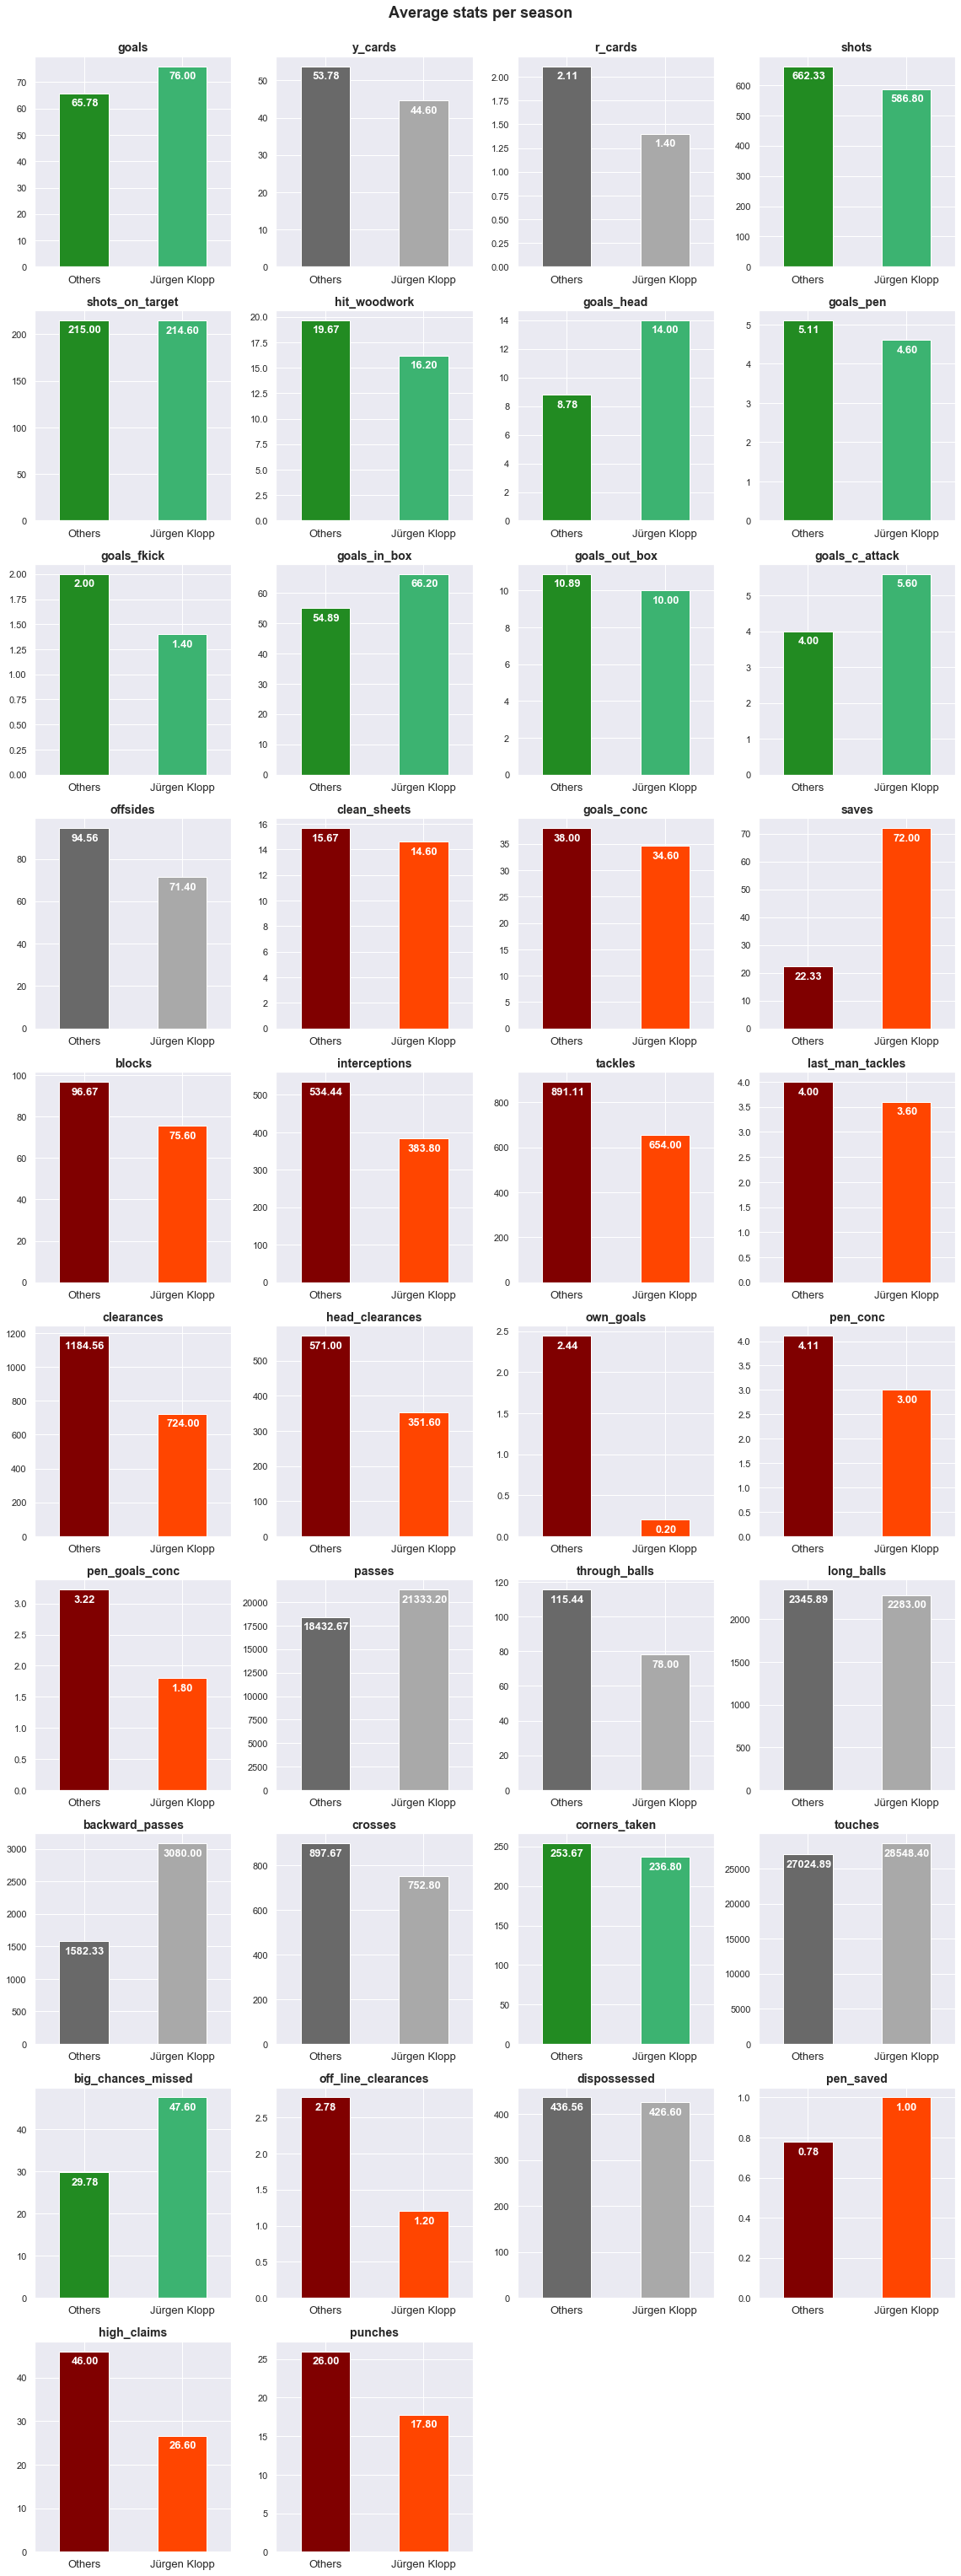

In [53]:
labels = ['Others', 'Jürgen Klopp']

# kolory w zależności od kategorii badanej cechy (obrona, atak, pozostałe)
# - gra obronna:
defence = ['clean_sheets', 'goals_conc', 'saves', 'blocks', 'interceptions', 'tackles', 'last_man_tackles', 'clearances', 
           'head_clearances', 'own_goals', 'pen_conc', 'pen_goals_conc', 'off_line_clearances', 'pen_saved', 'high_claims', 
           'punches']
colors_def = ['maroon', 'orangered']
# - gra w ataku:
offense = ['goals', 'shots', 'shots_on_target', 'hit_woodwork', 'goals_head', 'goals_pen', 'goals_fkick', 'goals_in_box', 
           'goals_out_box', 'goals_c_attack', 'corners_taken', 'big_chances_missed', '']
colors_off = ['forestgreen', 'mediumseagreen']
# - pozostałe:
rest = ['y_cards', 'r_cards', 'offsides', 'passes', 'through_balls', 'long_balls', 'backward_passes', 'crosses', 'touches', 
        'dispossessed', '']
colors_rest = ['dimgrey', 'darkgrey']

# generator kolejnych nazw kolumn
lfc_stats_cols = lfc_stats.columns
gen = (g for g in lfc_stats_cols)

# liczba kolumn i wierszy dla kolejnych wykresów
nrows = 10
ncols = 4

# nr kolejnej iteracji, aby uniknąć błędu StopIteration z generatora 
i = 0

# Multiplot
# WYKRESY KOLUMNOWE
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16,42))

for row in range(nrows):
    
    for col in range(ncols):
        
        if i < len(lfc_stats_cols):
            
            ## generowanie kolejnych nazw kolumn
            df_column = next(gen)
            
            ## paleta kolorów w zależności od kategorii
            if df_column in defence:
                colors = colors_def
            elif df_column in offense:
                colors = colors_off
            else:
                colors = colors_rest
            
            ## wykres
            lfc_stats[df_column].plot(ax=ax[row, col], kind='bar', color=colors, width=0.5)
            ax[row, col].set_xlabel('')
            ax[row, col].set_xticklabels(labels=labels, rotation='horizontal', size=13)
            ax[row, col].set_title(df_column, weight='bold', size=14)
            
            ## Adnotacje
            for p in ax[row, col].patches:
                ax[row, col].annotate(format(float(p.get_height()), '.2f'), (p.get_x() + p.get_width() / 2, p.get_height()), 
                              ha='center', va='center', xytext=(1,-12), textcoords='offset points', color='white', 
                                      weight='bold', size=13)     
            ## iteracja
            i += 1

# Usunięcie nadliczbowych wykresów
fig.delaxes(ax[9, 2])
fig.delaxes(ax[9, 3])

fig.subplots_adjust(top=1.2, hspace=2, wspace=0.5)

plt.suptitle('Average stats per season', size=18, weight='bold', y=1.01)
plt.tight_layout()

#save_plot('Average_stats_per_season')
plt.show()

**Wnioski**

W porównaniu do swoich poprzedników Jurgen Klopp przede wszystkim zrobił z The Reds drużynę, która prowadzi grę. Widać to nie tylko po wzroście ogólnej liczby podań (*passes*), ale także liczby podań do tyłu (*backward_passes*). Zarówno ten drugi aspekt, jak i spadek ilości podań górnych (*through balls*, *long balls*) czy krzyżowych (*crosses*) świadczą o tym, że Liverpool potrafi cierpliwie konstruować swoje ataki, dzięki czemu jest w nich mniej przypadku a dużo więcej jakości.

Kolejną rzeczą, która uległa zdecydowanej poprawie jest gra obronna. Spadek średniej liczby interwencji bramkarza i obrońców w powietrzu (*high claims*, *punches*, *clearances*, *head clearances*) dowodzi, że drużyna oddaliła niebezpieczeństwo od swojej bramki i nie dopuszcza rywali pod swoje pole karne zbyt często. Co więcej, mniej błędów w grze z tyłu pozwoliło na zmniejszenie liczby sytuacji, w których jedynym ratunkiem jest atak na rywala, a które, jak wiadomo, często kończą się rzutem karnym (*pen conc*). Oczywiście, rywale również zdobywają bramki w konfrontacjach z The Reds, ale ich ilość także spadła (*goals_conc*) m.in. dzięki świetnym interwencjom bramkarzy (*saves*). 

Na pierwszy rzut oka dziwić może spadek średniej liczby oddawanych strzałów (*shots*). Nie chodzi jednak o robienie szumu, z którego nic nie wynika, a prezentować jakość, a tę widać wyraźnie w strzałach celnych (*shots on target*) oraz - przede wszystkim - w zdobytych bramkach (*goals*).

## Konkluzja

Powyższą analizę na pewno da się bardziej rozbudować, zgłębiając zasoby internetu w celu znalezienia jeszcze bardziej szczegółowych statystyk. Mam jednak nadzieję, że obecny jej kształt jest wystarczający, aby przybliżyć możliwości jakie daje analiza i wizualizacja danych, do których dostęp tak naprawdę ma każdy użytkownik sieci.